In [2]:
#For data manipulation
import numpy as np
import pandas as pd
import json
import math

#For data visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import matplotlib.font_manager
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from matplotlib.pylab import rcParams

#For data pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#For clustering analysis
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#For evaluating clusters
from sklearn.metrics import calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, ward

#Suppress warnings from showing
import warnings
warnings.filterwarnings('ignore')

#Allow ourselves to save things
import pickle

In [3]:
#Define colours for the visuals
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

CB91_BlueD = '#016794'
CB91_GreenD = '#187970'
CB91_PinkD = '#B317B1'
CB91_PurpleD = '#4E1762'
CB91_VioletD = '#330E4C'
CB91_AmberD = '#985E09'

CB91_BlueL = '#ABE5FF'
CB91_GreenL = '#B5F1EB'
CB91_PinkL = '#FAD9FA'
CB91_PurpleL = '#D9A8EB'
CB91_VioletL = '#ECD4F5'
CB91_AmberL = '#F9D094'


#The following gradients will be used for heatmaps, etc
CB91_Grad_BP = ['#2CBDFE', '#2fb9fc', '#33b4fa', '#36b0f8',
                '#3aacf6', '#3da8f4', '#41a3f2', '#449ff0',
                '#489bee', '#4b97ec', '#4f92ea', '#528ee8',
                '#568ae6', '#5986e4', '#5c81e2', '#607de0',
                '#6379de', '#6775dc', '#6a70da', '#6e6cd8',
                '#7168d7', '#7564d5', '#785fd3', '#7c5bd1',
                '#7f57cf', '#8353cd', '#864ecb', '#894ac9',
                '#8d46c7', '#9042c5', '#943dc3', '#9739c1',
                '#9b35bf', '#9e31bd', '#a22cbb', '#a528b9',
                '#a924b7', '#ac20b5', '#b01bb3', '#b317b1']

CB91_Grad_BA = ['#2cbdfe', '#31bdf9', '#36bcf5', '#3bbcf0',
                '#41bcec', '#46bbe7', '#4bbbe3', '#50bbde',
                '#55bbd9', '#5abad5', '#60bad0', '#65bacc',
                '#6ab9c7', '#6fb9c3', '#74b9be', '#79b8ba',
                '#7eb8b5', '#84b8b0', '#89b7ac', '#8eb7a7',
                '#93b7a3', '#98b79e', '#9db69a', '#a3b695',
                '#a8b690', '#adb58c', '#b2b587', '#b7b583',
                '#bcb47e', '#c1b47a', '#c7b475', '#ccb371',
                '#d1b36c', '#d6b367', '#dbb363', '#e0b25e',
                '#e6b25a', '#ebb255', '#f0b151', '#f5b14c']

CB91_Grad_AP = ['#f5b14c', '#f3ae4f', '#f0aa52', '#eea755',
                '#eca458', '#eaa05c', '#e79d5f', '#e59962',
                '#e39665', '#e19368', '#de8f6b', '#dc8c6e',
                '#da8971', '#d88574', '#d58277', '#d37f7b',
                '#d17b7e', '#cf7881', '#cc7584', '#ca7187',
                '#c86e8a', '#c66a8d', '#c36790', '#c16493',
                '#bf6096', '#bd5d9a', '#ba5a9d', '#b856a0',
                '#b653a3', '#b450a6', '#b14ca9', '#af49ac',
                '#ad46af', '#ab42b2', '#a83fb5', '#a63bb9',
                '#a438bc', '#a235bf', '#9f31c2', '#9d2ec5']

CB91_Grad_GP = ['#47dbcd', '#4bd9ce', '#50d8cf', '#54d6d0',
                '#59d5d1', '#5dd3d2', '#61d2d3', '#66d0d4',
                '#6acfd5', '#6fcdd6', '#73ccd6', '#78cad7',
                '#7cc9d8', '#80c7d9', '#85c6da', '#89c4db',
                '#8ec3dc', '#92c1dd', '#96c0de', '#9bbedf',
                '#9fbde0', '#a4bbe1', '#a8bae2', '#acb8e3',
                '#b1b7e4', '#b5b5e5', '#bab4e6', '#beb2e7',
                '#c2b1e8', '#c7afe9', '#cbaee9', '#d0acea',
                '#d4abeb', '#d9a9ec', '#dda8ed', '#e1a6ee',
                '#e6a5ef', '#eaa3f0', '#efa2f1', '#f3a0f2']

CB91_Grad_GWP= ['#47dbcd','#4fdcce','#56ddd0','#5dded1',
                '#64dfd2','#6ae0d3','#70e1d5','#75e2d6',
                '#7be3d7','#80e4d8','#85e5da','#8ae6db',
                '#8fe7dc','#94e8dd','#98e9df','#9deae0',
                '#a1ebe1','#a6ece2','#aaede4','#afede5',
                '#b3eee6','#b7efe8','#bbf0e9','#c0f1ea',
                '#c4f2eb','#c8f3ed','#ccf4ee','#d0f5ef',
                '#d4f6f1','#d8f6f2','#dcf7f3','#e0f8f5',
                '#e4f9f6','#e8faf7','#ecfbf8','#f0fcfa',
                '#f3fcfb','#f7fdfc','#fbfefe','#ffffff',
                '#fdfafe','#fbf5fc','#f9f0fb','#f7eaf9',
                '#f4e5f8','#f2e0f7','#f0dbf5','#eed6f4',
                '#ecd1f2','#e9ccf1','#e7c7f0','#e5c1ee',
                '#e2bced','#e0b7eb','#deb2ea','#dbade8',
                '#d9a8e7','#d6a3e5','#d49ee4','#d199e2',
                '#cf94e1','#cc8fdf','#ca89de','#c784dc',
                '#c57fdb','#c27ad9','#bf75d8','#bd6fd6',
                '#ba6ad5','#b765d3','#b45fd2','#b25ad0',
                '#af54cf','#ac4ecd','#a949cb','#a642ca',
                '#a33cc8','#a035c7','#9d2ec5']

CB91_Grad_BWP= ['#2cbdfe','#31bffe','#37c0fe','#3cc2fe',
                '#42c4fe','#47c5fe','#4cc7fe','#52c9fe',
                '#57cbfe','#5dccfe','#62cefe','#68d0fe',
                '#6dd1fe','#72d3fe','#78d5fe','#7dd6fe',
                '#83d8fe','#88dafe','#8ddbfe','#93ddfe',
                '#98dfff','#9ee1ff','#a3e2ff','#a8e4ff',
                '#aee6ff','#b3e7ff','#b9e9ff','#beebff',
                '#c3ecff','#c9eeff','#cef0ff','#d4f1ff',
                '#d9f3ff','#dff5ff','#e4f7ff','#e9f8ff',
                '#effaff','#f4fcff','#fafdff','#ffffff',
                '#fdfafe','#fbf5fc','#f9f0fb','#f7eaf9',
                '#f4e5f8','#f2e0f7','#f0dbf5','#eed6f4',
                '#ecd1f2','#e9ccf1','#e7c7f0','#e5c1ee',
                '#e2bced','#e0b7eb','#deb2ea','#dbade8',
                '#d9a8e7','#d6a3e5','#d49ee4','#d199e2',
                '#cf94e1','#cc8fdf','#ca89de','#c784dc',
                '#c57fdb','#c27ad9','#bf75d8','#bd6fd6',
                '#ba6ad5','#b765d3','#b45fd2','#b25ad0',
                '#af54cf','#ac4ecd','#a949cb','#a642ca',
                '#a33cc8','#a035c7','#9d2ec5']

#Add party colors
con_blue = '#0A3B7C'
lab_red = '#E4003B'
lib_yel = '#FAA61A'
snp_yel = '#FFF481'
green_green = '#52DF00'
brex_blue = '#00E2ED'
ukip_pur = '#470A65'
plaid_green = '#006A56'

con_lab = '#992281'
con_lib = '#837859'
con_snp = '#85987f'
lab_lib = '#ef532b'
lab_snp = '#f27a5e'
lib_snp = '#fccf4d'


#A list that we'll use to cycle through colors in charts
color_list = [CB91_Blue, CB91_Green, CB91_Amber, CB91_Pink,
              CB91_Violet, CB91_BlueD, CB91_GreenD, CB91_Purple,
              CB91_AmberL, CB91_BlueL, CB91_GreenL, CB91_AmberD, 
              CB91_VioletD, CB91_PinkL, CB91_VioletL, CB91_PinkD]


#Use seaborn to set all the default chart visual settings
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":16})

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

In [5]:
df = pd.read_csv('data_with_targets.csv')

In [6]:
def gradient_mapper(kpi, grad, outliers=None, stretch=1, factor=1):
    
    '''
    Takes a list/series of numbers, outputs a list of hex colours,
    appropriate for heatmapping the initial data.
    
    Parameters:
    - col (list/series, etc.): The data to be transformed
    - grad (list hex codes): A list of colors that the data will be transformed to
    - outliers (top,bottom,both): Stretches the outliers, resulting in more gradient
                                  change amongst clustered values
    - stretch (int): The number of colors to duplicate if outliers variable used
    - factor (int): The scale of color duplication if outliers variable used
    
    '''
    #Work out how many colours we have in the given gradient
    colors = len(grad)
    half = colors // 2
    
    #Ensure that stretch is possible
    stretch = min(half//3, stretch)
    
    factors = [4*factor, 3*factor, 2*factor]
    
    if outliers != None:
        #Stretch gradient if required. Declare three lists:
        #Start is the stretch map for the bottom end
        if (outliers.lower() == 'bottom') or (outliers.lower() == 'both'):
            start = [factors[0]]*stretch + [factors[1]]*stretch + [factors[2]]*stretch
        else:
            start = []

        #End is the stretch map for the top end
        if (outliers.lower() == 'top') or (outliers.lower() == 'both'):
            end = [factors[2]]*stretch + [factors[1]]*stretch + [factors[0]]*stretch
        else:
            end = []

        #Middle is a list of 1s which will be non-transformed
        middle = [1 for i in range(colors - len(start) - len(end))]

        stretch_map = start + middle + end
        
    else:
        stretch_map = [1 for i in range(colors)]
        
    #Create tuples of the gradients, and the number of
    #times they should be repeated in the list
    zip_list = list(zip(grad,stretch_map))
    
    #Use this to create a list of lists
    #Each element will be a list of the same gradient
    #repeated the required number of times
    list_of_lists = [[i[0]]*i[1] for i in zip_list]
    
    #Melt this list of lists into a single list
    grad = sum(list_of_lists, [])
    
    #Re-define colors variable
    colors = len(grad)-1
    
    #Define the lowest and the highest points in the dataset
    kpi_min = kpi.min()
    kpi_max = kpi.max()
    
    #Transform the data to integers between zero and the length of the gradient list
    first_map = list(map(lambda x: int(round(colors*(x-kpi_min) /
                                             (kpi_max-kpi_min),0)), list(kpi)))
    
    #Map the integers onto the gradient list
    second_map = list(map(lambda x: grad[x], first_map))
    
    #Return this, as well as the new gradient
    return second_map, grad




f = open('constituencieshex.json')
datamap = json.load(f)
datamap = pd.DataFrame(datamap['hexes']).T
datamap = datamap[['n','q','r']]
datamap.columns=['Name','X','Y']

def kpi_map(kpi, width=6, colorbar=True,
            outliers=None, stretch=1, factor=1,
            exclude=[], title=None,
            colors=None, exc_color='#999999',
            grad=CB91_Grad_AP, data=df):
    
    '''
    Outputs a choropleth map, showing each constituency in the same size.
    
    Parameters:
    - kpi (list/series, etc.): The data to be transformed
    - width (float): The desired width of the figure
    - df (dataframe): The dataframe to get the data from
    - grad (list hex codes): A list of colors that the data will be transformed to
    - outliers (top,bottom,both): Stretches the outliers, resulting in more gradient
                                  change amongst clustered values
    - stretch (int): The number of colors to duplicate if outliers variable used
    - factor (int): The scale of color duplication if outliers variable used
    - exclude (list): A list of regions to exclude from the chart
    - colors (dataframe): A dataframe of hex-codes (index should be constituency codes)
    - title (string): The desired title of the chart
    
    '''    
    
    #Filter out different regions, depending on paramaters
    df_filtered = pd.concat([datamap, data[['Region',kpi]]], axis=1)
    
    #If we have colors to add, concatonate these in
    if isinstance(colors, pd.DataFrame):
        df_filtered = pd.concat([df_filtered, colors], axis=1)
        df_filtered.columns = ['Name', 'X', 'Y', 'Region', kpi, 'Colors']
    
    df_filtered = df_filtered.loc[~df_filtered['Region'].isin(exclude)]
    kpi_filtered = df_filtered[kpi]
    
    if isinstance(colors, pd.DataFrame) is False:
        #Use the gradient mapper function to return the colors for the plot
        gradient_map = gradient_mapper(kpi=kpi_filtered,
                                    grad=grad,
                                    outliers=outliers,
                                    stretch=stretch,
                                    factor=factor)
        colors_map = gradient_map[0]
    
    else:
        #Fill in nan colors with white
        df_filtered['Colors'].fillna(exc_color, inplace=True)
        
        #Return the column to be used as the colours list in the plot
        colors_map = list(df_filtered['Colors'])
    
    #Work out the aspect ratio of the filtered constituencies
    X_diff = np.max(df_filtered['X'])-np.min(df_filtered['X'])
    Y_diff = np.max(df_filtered['Y'])-np.min(df_filtered['Y'])
    
    #Declare the width and height of the plot
    height = width * (Y_diff/X_diff)
    size = 500*math.pi*((width/X_diff)**2)
    
    #Create the figure
    fig, ax = plt.subplots(figsize=(width,height))
    
    plt.xticks([])
    plt.yticks([])

    #Plot the scatter
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(df_filtered['X'],
                df_filtered['Y'],
                s=size,
                marker='s',
                c=colors_map)
    
    #Remove axes
    sns.despine(left=True, bottom=True)
    ax1.set_title(title);
    
    #plot the colorbar
    if (colorbar == True) and isinstance(colors, pd.DataFrame) is False:        
        cmap = LinearSegmentedColormap.from_list(name= '',
                                                 colors=gradient_map[1])
        ax2 = fig.add_subplot(2,30,28)
        norm = mpl.colors_map.Normalize(vmin=df_filtered[kpi].min(),
                                    vmax=df_filtered[kpi].max())
        cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                       norm=norm, orientation='vertical')
    
        # remove the x and y ticks
        for ax in [ax1,ax2]:
            ax.set_xticks([])
            ax.set_yticks([])
    
    else:
        ax1.set_xticks([])
        ax1.set_yticks([])

In [7]:
df_gb = pd.read_csv('data_gb.csv', index_col='ID')

In [8]:
df_gb_log_columns = df_gb.copy()

df_gb_log_columns[['AreaKM2', 'Pop_Density','Businesses', 'BusinessesPer1kCap','2019_Wage', 'HousePrice', 
       'HousePricePerWage']].apply(np.log1p, inplace=True)

X_gb_log = df_gb_log_columns.iloc[:,:-1].drop(columns=['Winner_17'])

In [9]:
X_gb_log

,0-19%,20-29%,30-59%,60+%,AreaKM2,Pop_Density,Businesses,%BusinessGrowth,BusinessesPer1kCap,%Unemployment,...,%BornUK,%Born_Other_Europe,%Born_RestOf_theWorld,%Born_Asia,MbpsSpeed,%UnableDecent,%Under10Mbps,%LeaveVote,%17Turnout,seat_types_17
ID,,,,,,,,,,,,,,,,,,,,,
E14000554,0.1765,0.0902,0.3761,0.3556,2379.418011,31.698928,3500,0.136364,46.403712,0.028975,...,0.968528,0.016892,0.009060,0.005507,29.6,0.06252,0.2489,0.553,0.719149,con safe
E14000569,0.2189,0.1103,0.3829,0.2919,922.670335,96.908935,3200,0.128748,35.788179,0.057016,...,0.976108,0.013059,0.006059,0.004774,29.0,0.04792,0.2432,0.609,0.640827,con lab marginal
E14000574,0.2034,0.0984,0.3993,0.2920,110.329843,797.408914,2305,0.194301,26.199732,0.042835,...,0.974581,0.011475,0.007839,0.006106,41.9,0.02269,0.2393,0.561,0.703311,lab safe
E14000575,0.2179,0.1087,0.3908,0.2806,70.362520,1198.649502,1840,0.222591,21.816457,0.057092,...,0.976805,0.011975,0.005914,0.005306,30.5,0.00114,0.2446,0.605,0.671135,lab safe
E14000641,0.3305,0.2110,0.3419,0.2359,186.642526,549.360332,2450,0.266150,23.894513,0.032860,...,0.930628,0.026458,0.021860,0.021054,32.5,0.00630,0.2329,0.433,0.680566,lab safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W07000076,0.2340,0.1195,0.3958,0.2473,114.529516,770.648502,2065,0.286604,23.396252,0.042270,...,0.972890,0.013946,0.006933,0.006231,31.8,0.00352,0.2351,0.551,0.642736,lab safe
W07000077,0.2364,0.1216,0.3930,0.2587,112.003274,684.033576,2550,0.841155,33.283734,0.038407,...,0.979671,0.010728,0.004814,0.004787,29.2,0.00344,0.2564,0.589,0.642971,lab safe
W07000078,0.2255,0.1119,0.3889,0.2685,315.170195,324.751520,3205,0.209434,31.313506,0.034980,...,0.956207,0.020484,0.013598,0.009710,47.7,0.01863,0.2050,0.526,0.727173,con lab marginal


### Scaling

In [10]:
X_gb_log = pd.get_dummies(X_gb_log, drop_first=True)

scaler = StandardScaler()
X_gb_scaled_log = scaler.fit_transform(X_gb_log)

In [11]:
print(X_gb_scaled_log.shape)

(631, 66)


### PCA/Dimensionality Reduction

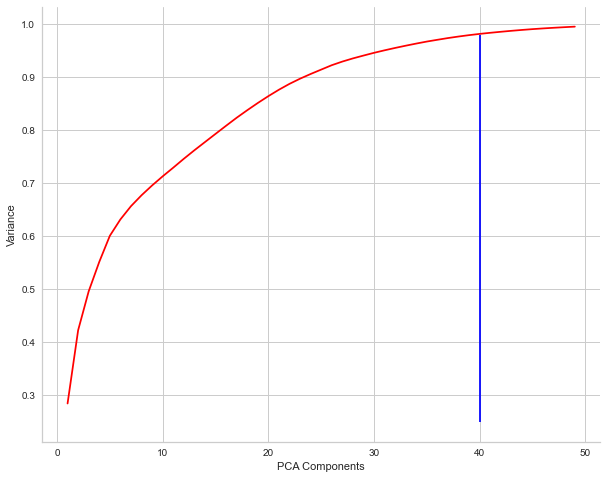

In [328]:
# log columns
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 50):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(X_gb_scaled_log) # has 66 features
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')


plt.figure(figsize=(10,8))
sns.lineplot(x='n', y='var', data=pca_df, color='red')
plt.vlines(x=40, ymin=0.25, ymax=0.98, color='blue')
plt.xlabel('PCA Components')
plt.ylabel('Variance')
plt.show()

In [329]:
# A good number of features would be 40 as it retains above 95% of the information

## Several Clustering Methods:

### K-Means

In [507]:
# Now try K-Means on the gb dataset after PCA using 36 features
# Log dataset

PCAmod = PCA(n_components=40)
PCAmod.fit(X_gb_scaled_log)
PCA_df_gb_log = pd.DataFrame(PCAmod.transform(X_gb_scaled_log))

#Declare k_values
k_values = range(3,30)

#Initiate some empty lists for the GB dataset
km_preds_gb_log = []
km_cs_scores_gb_log = []
km_inertia_scores_gb_log = []

#Iterate through these
for k in k_values:
    #Instantiate and run a KMeans algorithm
    k_means = KMeans(n_clusters=k)
    k_means.fit(PCA_df_gb_log)
    
    #Store the predicted labels
    km_preds_gb_log.append(k_means.predict(PCA_df_gb_log))
    
    #Evaluate and store the clusters' Calinski Harabasz score
    cs_score = calinski_harabasz_score(PCA_df_gb_log, k_means.labels_)
    inertia_score = k_means.inertia_
    km_cs_scores_gb_log.append(cs_score)
    km_inertia_scores_gb_log.append(inertia_score)

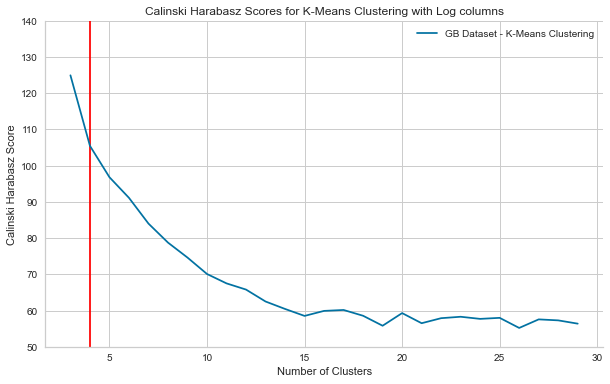

In [508]:
plt.figure(figsize=(10,6))

alpha = 1

plt.plot(k_values, km_cs_scores_gb_log, alpha=alpha,
            label='GB Dataset - K-Means Clustering')


plt.vlines(x=4, ymin=0, ymax=140, color='red')
plt.ylim(50,140)

plt.legend(frameon=False)

plt.title('Calinski Harabasz Scores for K-Means Clustering with Log columns')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score');

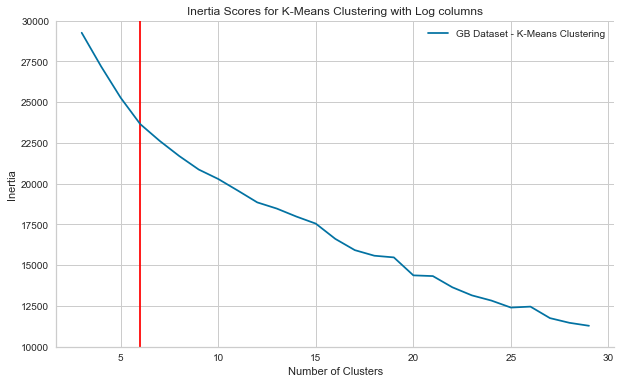

In [509]:
plt.figure(figsize=(10,6))

alpha = 1

plt.plot(k_values, km_inertia_scores_gb_log, alpha=alpha,
            label='GB Dataset - K-Means Clustering')


plt.vlines(x=6, ymin=0, ymax=40000, color='red')
plt.ylim(10000,30000)


plt.legend(frameon=False)

plt.title('Inertia Scores for K-Means Clustering with Log columns')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

https://medium.com/mlearning-ai/deciding-number-of-clusters-using-gap-statistics-davies-bouldin-index-calinski-harabasz-index-2ce9acfb6118

In [510]:
from gap_statistic import OptimalK
from sklearn.cluster import KMeans
def KMeans_clustering_func(X, k):
    """ 
    K Means Clustering function, which uses the K Means model from sklearn.
    
    These user-defined functions *must* take the X (input features) and a k 
    when initializing OptimalK
    """
    
    # Include any clustering Algorithm that can return cluster centers
    
    m = KMeans(random_state=11, n_clusters=k)
    m.fit(X)
    
    # Return the location of each cluster center,
    # and the labels for each point.
    return m.cluster_centers_, m.predict(X)
#--------------------create a wrapper around OptimalK to extract cluster centers and cluster labels
optimalK = OptimalK(clusterer=KMeans_clustering_func)
#--------------------Run optimal K on the input data (subset_scaled_interim) and number of clusters
n_clusters = optimalK(PCA_df_gb_log, cluster_array=np.arange(1, 15))
print('Optimal clusters: ', n_clusters)
#--------------------Gap Statistics data frame
optimalK.gap_df[['n_clusters', 'gap_value']]

Optimal clusters:  14


,n_clusters,gap_value
0,1.0,2.210777
1,2.0,2.353677
2,3.0,2.413854
3,4.0,2.445900
4,5.0,2.495275
5,6.0,2.528003
6,7.0,2.560510
7,8.0,2.575552
8,9.0,2.593781
9,10.0,2.621548


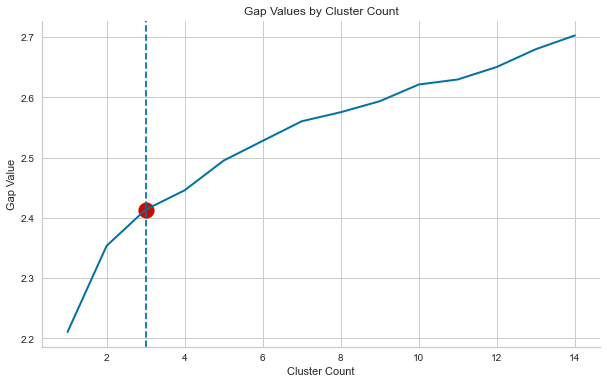

In [511]:
plt.figure(figsize=(10,6))
n_clusters=3
plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=2)
plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.axvline(3, linestyle="--")
plt.show()

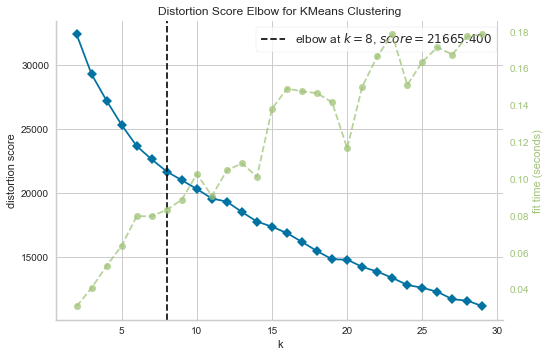

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [512]:
import yellowbrick

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(PCA_df_gb_log)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

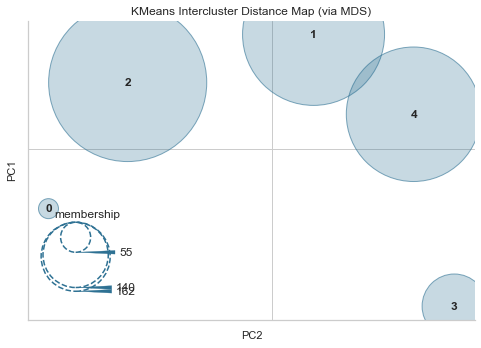

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [513]:
# Inter cluster distance map
from yellowbrick.cluster import InterclusterDistance
# Fit K-Means
kmeans_1 = KMeans(n_clusters=5,random_state= 10)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(PCA_df_gb_log)
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(kmeans_1)
visualizer.fit(PCA_df_gb_log)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

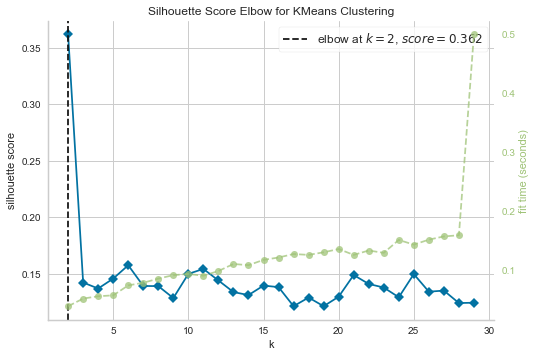

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [514]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(PCA_df_gb_log)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

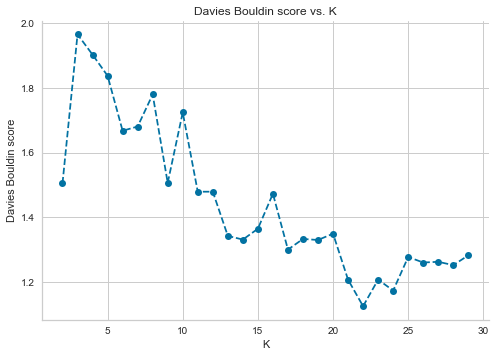

In [515]:
# As DB Index falls, clustering improves
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)
# Then fit the model to your data using the fit method
    model = kmeans.fit_predict(data)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    
    return score

scores = []
centers = list(range(2,30))
for center in centers:
    scores.append(get_kmeans_score(PCA_df_gb_log, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

In [516]:
#### K-Means Score after picking 8 Clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# Fit K-Means
kmeans_1 = KMeans(n_clusters=10,random_state= 10)

# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(PCA_df_gb_log)

# Calculate cluster validation metrics
score_kemans_s = silhouette_score(PCA_df_gb_log, kmeans_1.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(PCA_df_gb_log, kmeans_1.labels_)
score_kemans_d = davies_bouldin_score(PCA_df_gb_log, predictions)


print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.1215
Calinski Harabasz Score: 69.2727
Davies Bouldin Score: 1.6030


In [517]:
y19_st_gb = df_gb['seat_types_yg'] # You Gov

In [518]:
y17_st_gb = df_gb['seat_types_17']

In [519]:
y19_st_gb

ID
E14000554            con safe
E14000569    con lab marginal
E14000574            lab safe
E14000575    con lab marginal
E14000641    con lab marginal
                   ...       
W07000076            lab safe
W07000077            lab safe
W07000078    con lab marginal
W07000079            lab safe
W07000080            lab safe
Name: seat_types_yg, Length: 631, dtype: object

In [520]:
y17_st_gb.index

Index(['E14000554', 'E14000569', 'E14000574', 'E14000575', 'E14000641',
       'E14000658', 'E14000677', 'E14000709', 'E14000733', 'E14000746',
       ...
       'W07000071', 'W07000072', 'W07000073', 'W07000074', 'W07000075',
       'W07000076', 'W07000077', 'W07000078', 'W07000079', 'W07000080'],
      dtype='object', name='ID', length=631)

In [521]:
km_preds_gb_log[5][:3]

array([6, 2, 2])

In [522]:
gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(km_preds_gb_log[5], # We choose 8 clusters
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1,2,3,4,5,6,7
seat_types_yg,,,,,,,,
con lab marginal,68,9,40,4,16,7,3,0
con ld marginal,0,0,4,4,10,0,4,0
con pc marginal,0,0,0,0,0,0,1,0
con safe,27,0,131,1,79,0,21,0
con snp marginal,2,0,0,0,2,0,14,2
green safe,0,1,0,0,0,0,0,0
lab ld marginal,0,1,0,0,0,0,0,0
lab safe,53,23,5,23,2,29,0,0
lab snp marginal,0,0,0,0,0,0,0,10


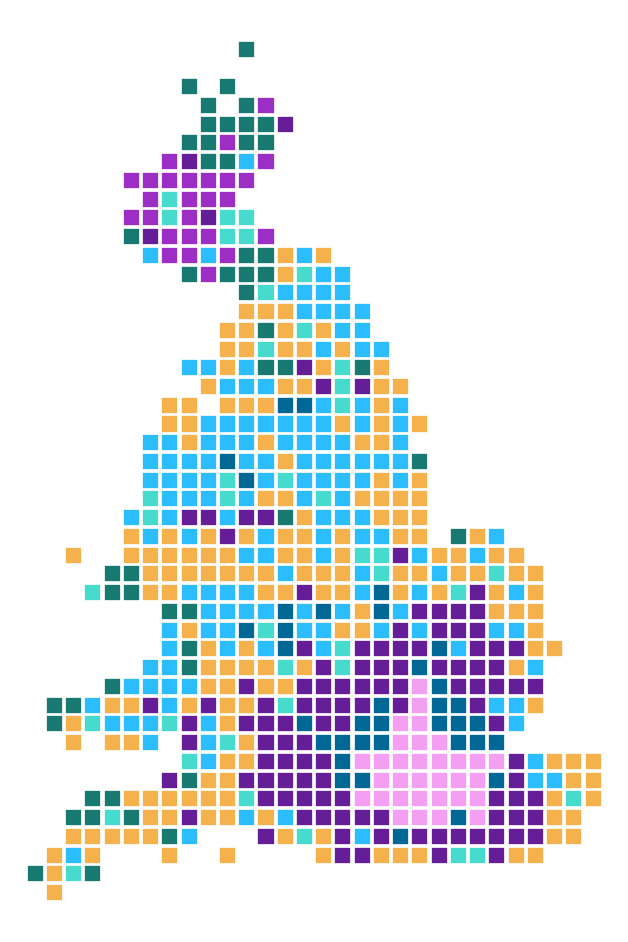

In [523]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

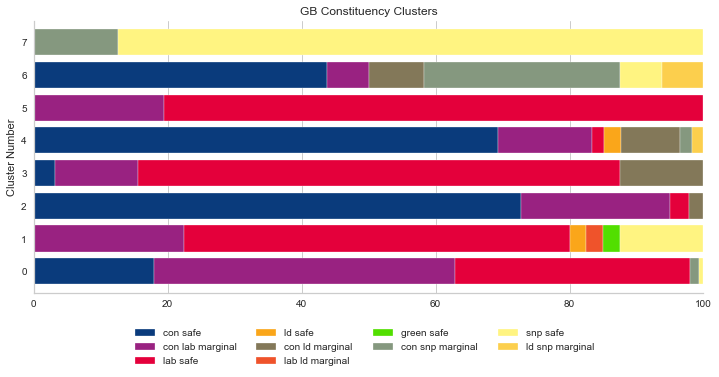

In [524]:
party_list = ['con safe','con lab marginal',
              'lab safe','ld safe',
              'con ld marginal','lab ld marginal',
              'green safe', 'con snp marginal', 'snp safe', 'ld snp marginal']

party_colors = [con_blue, con_lab, lab_red, lib_yel,
               con_lib, lab_lib, green_green, con_snp, snp_yel, lib_snp]

gb_cluster_yg_pivot=gb_cluster_yg_pivot.reindex(party_list)

gb_cluster_bar = (gb_cluster_yg_pivot / gb_cluster_yg_pivot.sum()).T

gb_cluster_bar.plot.barh(stacked=True,
                          figsize=(12,5),
                          width=0.8,
                          color=party_colors)

plt.xticks(ticks = np.arange(0,1.2,0.2), labels = np.arange(0,120,20))
plt.xlim(0,1);

plt.title('GB Constituency Clusters');
plt.ylabel('Cluster Number')

plt.legend(bbox_to_anchor=(0.85, -0.1),
           ncol=4,
           frameon=False);

### UMAP / K-Means

In [374]:
import umap

umap_c = umap.UMAP(n_components=3, n_neighbors=20, metric='euclidean' , init='random', random_state=0)
gb = umap_c.fit_transform(PCA_df_gb_log)
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=0)
yhat = kmeans.fit_predict(gb)

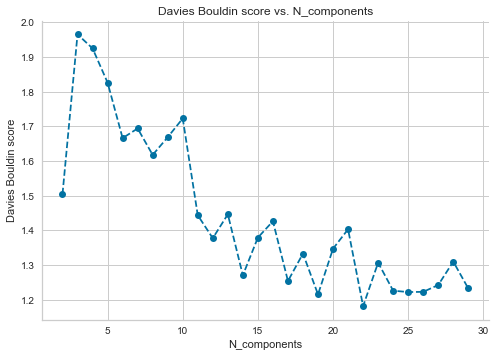

In [372]:
# As DB Index falls, clustering improves
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_umap_score(data, n):
    '''
    returns the UMAP K-Means score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = umap.UMAP(n_components=n, n_neighbors=20, metric='euclidean' , init='random', random_state=0)
# Then fit the model to your data using the fit method
    model = kmeans.fit_predict(data)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    
    return score

scores = []
centers = list(range(2,30))
for center in centers:
    scores.append(get_kmeans_score(PCA_df_gb_log, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('N_components');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. N_components');

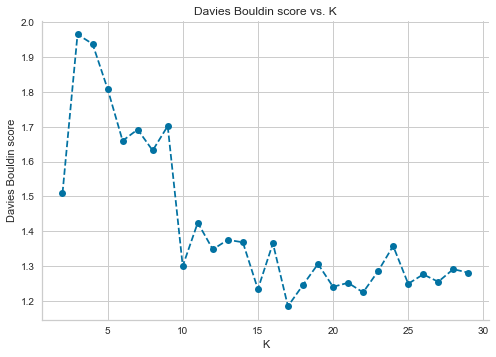

In [373]:
# As DB Index falls, clustering improves
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_umap_score(data, centers):
    '''
    returns the UMAP K-Means score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = umap.UMAP(n_components=3, n_neighbors=20, metric='euclidean' , init='random', random_state=0)
# Then fit the model to your data using the fit method
    model = kmeans.fit_predict(data)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    
    return score

scores = []
centers = list(range(2,30))
for center in centers:
    scores.append(get_kmeans_score(PCA_df_gb_log, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

In [375]:
# retrieve unique clusters
clusters = np.unique(yhat)


db_preds_gb = []
#Store the predicted labels
db_preds_gb.append(yhat)


gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(db_preds_gb[0], 
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1,2,3,4,5,6,7,8,9
seat_types_yg,,,,,,,,,,
con lab marginal,0,44,0,13,0,8,44,23,0,15
con ld marginal,1,0,0,0,0,1,0,0,17,3
con pc marginal,0,0,0,0,0,1,0,0,0,0
con safe,78,4,0,43,0,52,37,1,43,1
con snp marginal,0,0,15,0,2,3,0,0,0,0
green safe,0,0,0,0,0,0,0,1,0,0
lab ld marginal,0,0,0,0,0,0,1,0,0,0
lab safe,0,37,0,0,0,0,1,55,0,42
lab snp marginal,0,0,0,0,10,0,0,0,0,0


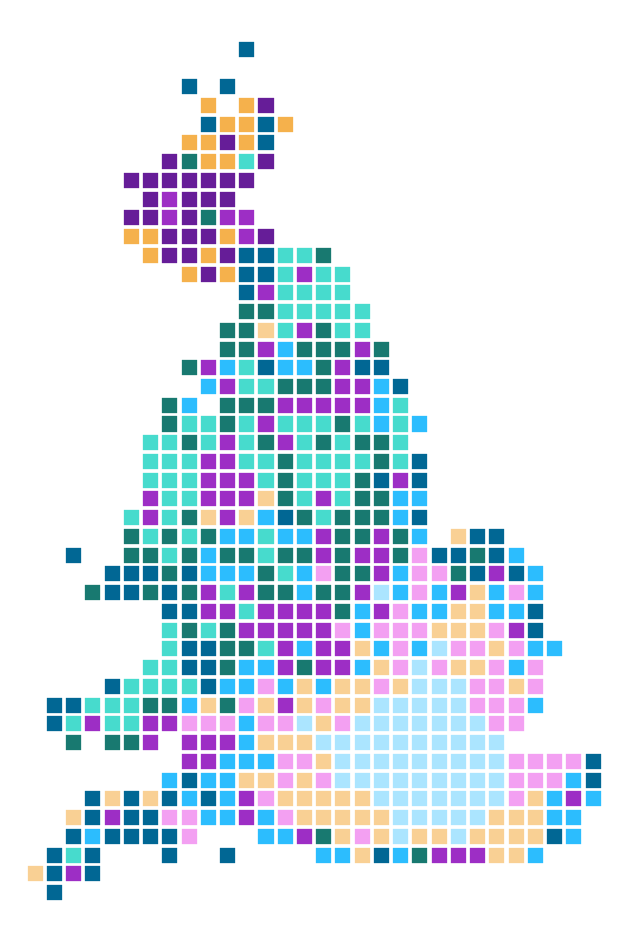

In [376]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

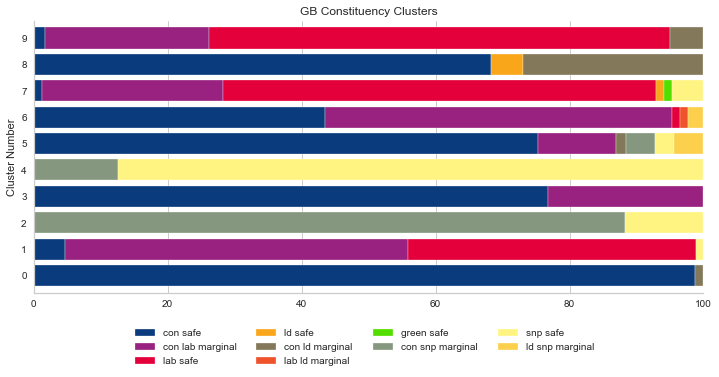

In [377]:
party_list = ['con safe','con lab marginal',
              'lab safe','ld safe',
              'con ld marginal','lab ld marginal',
              'green safe', 'con snp marginal', 'snp safe', 'ld snp marginal']

party_colors = [con_blue, con_lab, lab_red, lib_yel,
               con_lib, lab_lib, green_green, con_snp, snp_yel, lib_snp]

gb_cluster_yg_pivot=gb_cluster_yg_pivot.reindex(party_list)

gb_cluster_bar = (gb_cluster_yg_pivot / gb_cluster_yg_pivot.sum()).T

gb_cluster_bar.plot.barh(stacked=True,
                          figsize=(12,5),
                          width=0.8,
                          color=party_colors)

plt.xticks(ticks = np.arange(0,1.2,0.2), labels = np.arange(0,120,20))
plt.xlim(0,1);

plt.title('GB Constituency Clusters');
plt.ylabel('Cluster Number')

plt.legend(bbox_to_anchor=(0.85, -0.1),
           ncol=4,
           frameon=False);

### HAC

In [378]:
# Now try K-Means on the gb dataset after PCA using 25 features

PCAmod = PCA(n_components=40)
PCAmod.fit(X_gb_scaled_log)
PCA_df_gb = pd.DataFrame(PCAmod.transform(X_gb_scaled_log))

#Declare k_values
k_values = range(3,30)

#Initiate some empty lists for the GB dataset
hac_preds_gb = []
hac_cs_scores_gb = []

#Iterate through these
for k in k_values:
    #Instantiate and run a KMeans algorithm
    agg_clust = AgglomerativeClustering(n_clusters=k)
    preds = agg_clust.fit_predict(PCA_df_gb)

    #Store the predicted labels
    hac_preds_gb.append(preds)
    
    #Evaluate and store the clusters' Calinski Harabasz score
    cs_score = calinski_harabasz_score(PCA_df_gb, preds)
    hac_cs_scores_gb.append(cs_score)

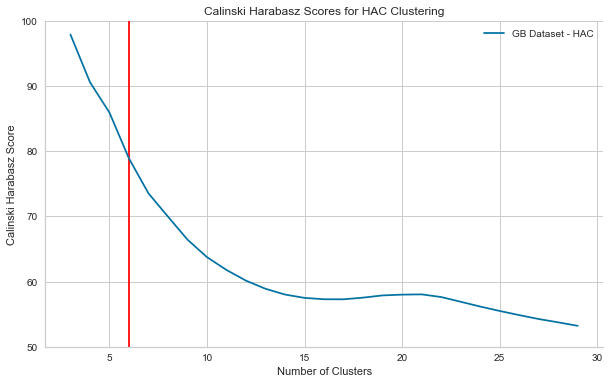

In [380]:
plt.figure(figsize=(10,6))

alpha = 1

plt.plot(k_values, hac_cs_scores_gb, alpha=alpha,
            label='GB Dataset - HAC')
8
plt.vlines(x=6, ymin=0, ymax=120, color='red')
plt.ylim(50,100)

plt.legend(frameon=False)

plt.title('Calinski Harabasz Scores for HAC Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score');

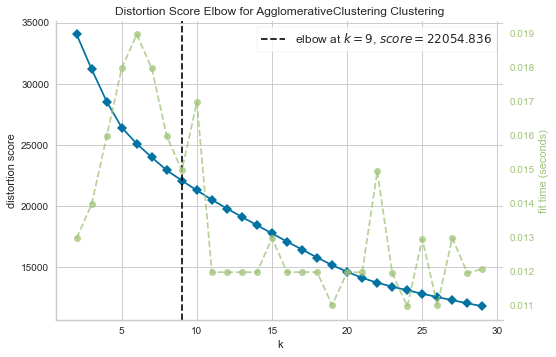

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [381]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(PCA_df_gb)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

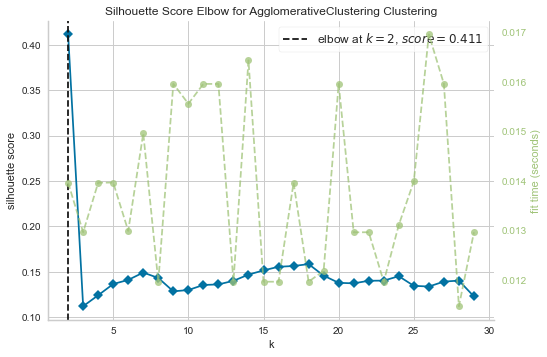

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [382]:
# Silhouette Score for HAC
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(PCA_df_gb)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

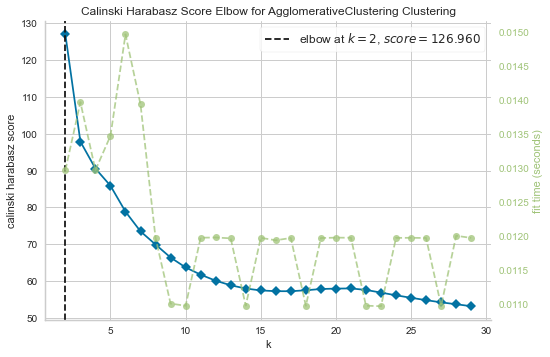

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [383]:
# Calinski Harabasz Score for K means
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(PCA_df_gb)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

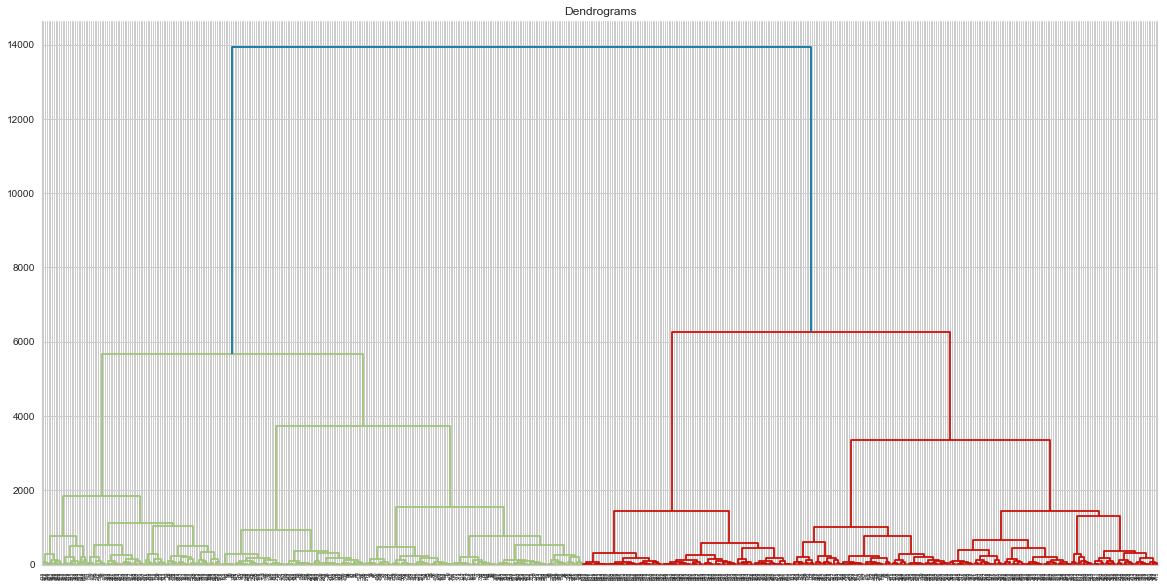

In [385]:
# Dendogram for Heirarchical Clustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

 
model = AgglomerativeClustering()
model = model.fit(PCA_df_gb)
Z = hierarchy.linkage(model.children_, 'ward')
plt.figure(figsize=(20,10))
plt.title("Dendrograms") 
dn = hierarchy.dendrogram(Z)

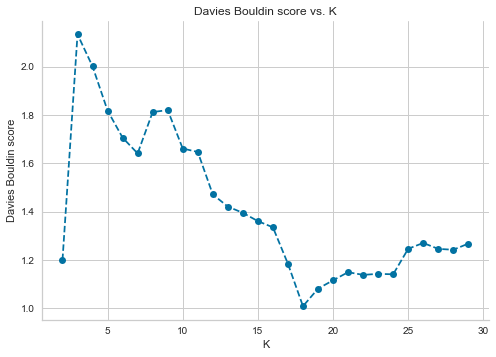

In [386]:
# 10 clusters seems reasonable to assume

# Davies Bouldin score for HAC
from sklearn.metrics import davies_bouldin_score
def get_hac_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    AC = AgglomerativeClustering(n_clusters=center)
    # Then fit the model to your data using the fit method
    model = AC.fit_predict(data)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    
    return score

scores = []
centers = list(range(2,30))
for center in centers:
    scores.append(get_hac_score(PCA_df_gb, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

In [387]:
# define the model
model = AgglomerativeClustering(n_clusters=10)

# fit model and predict clusters
yhat = model.fit(PCA_df_gb)
yhat_2 = model.fit_predict(PCA_df_gb)

# retrieve unique clusters
clusters = np.unique(yhat)

# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(PCA_df_gb, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(PCA_df_gb, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(PCA_df_gb, yhat_2)

print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.1409
Calinski Harabasz Score: 78.8709
Davies Bouldin Score: 1.7058


In [403]:
gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(hac_preds_gb[7], # We choose 10 clusters
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1,2,3,4,5,6,7,8,9
seat_types_yg,,,,,,,,,,
con lab marginal,0,8,59,41,15,3,0,2,18,1
con ld marginal,0,0,0,5,14,0,0,3,0,0
con pc marginal,1,0,0,0,0,0,0,0,0,0
con safe,0,0,57,118,82,0,0,0,2,0
con snp marginal,15,0,0,3,0,0,2,0,0,0
green safe,0,0,0,0,1,0,0,0,0,0
lab ld marginal,0,1,0,0,0,0,0,0,0,0
lab safe,0,24,43,1,3,19,0,22,23,0
lab snp marginal,0,0,0,0,0,0,10,0,0,0


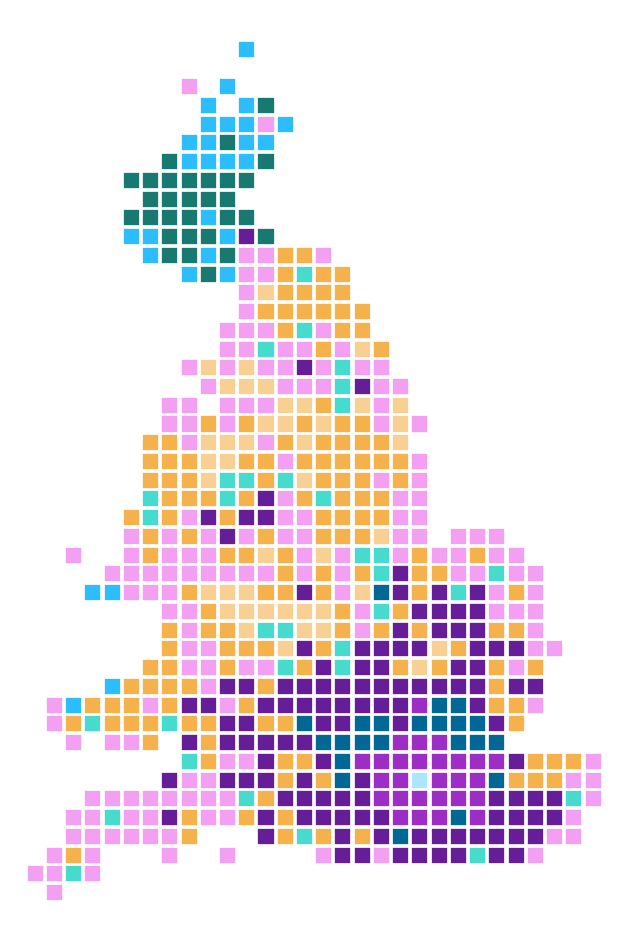

In [404]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

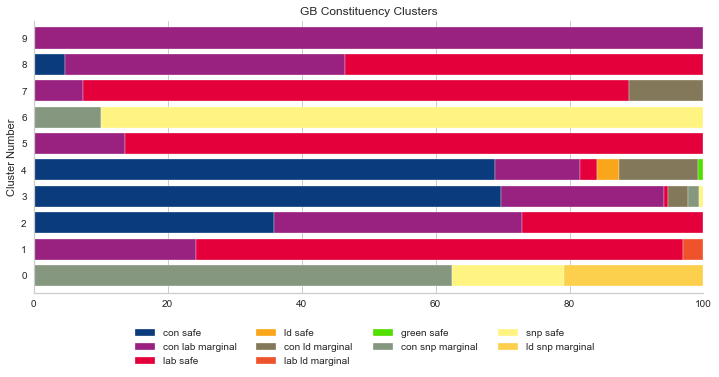

In [405]:
party_list = ['con safe','con lab marginal',
              'lab safe','ld safe',
              'con ld marginal','lab ld marginal',
              'green safe', 'con snp marginal', 'snp safe', 'ld snp marginal']

party_colors = [con_blue, con_lab, lab_red, lib_yel,
               con_lib, lab_lib, green_green, con_snp, snp_yel, lib_snp]

gb_cluster_yg_pivot=gb_cluster_yg_pivot.reindex(party_list)

gb_cluster_bar = (gb_cluster_yg_pivot / gb_cluster_yg_pivot.sum()).T

gb_cluster_bar.plot.barh(stacked=True,
                          figsize=(12,5),
                          width=0.8,
                          color=party_colors)

plt.xticks(ticks = np.arange(0,1.2,0.2), labels = np.arange(0,120,20))
plt.xlim(0,1);

plt.title('GB Constituency Clusters');
plt.ylabel('Cluster Number')

plt.legend(bbox_to_anchor=(0.85, -0.1),
           ncol=4,
           frameon=False);

### DB Clustering

In [406]:
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
X_gb_scaled = scaler.fit_transform(X_gb_log)

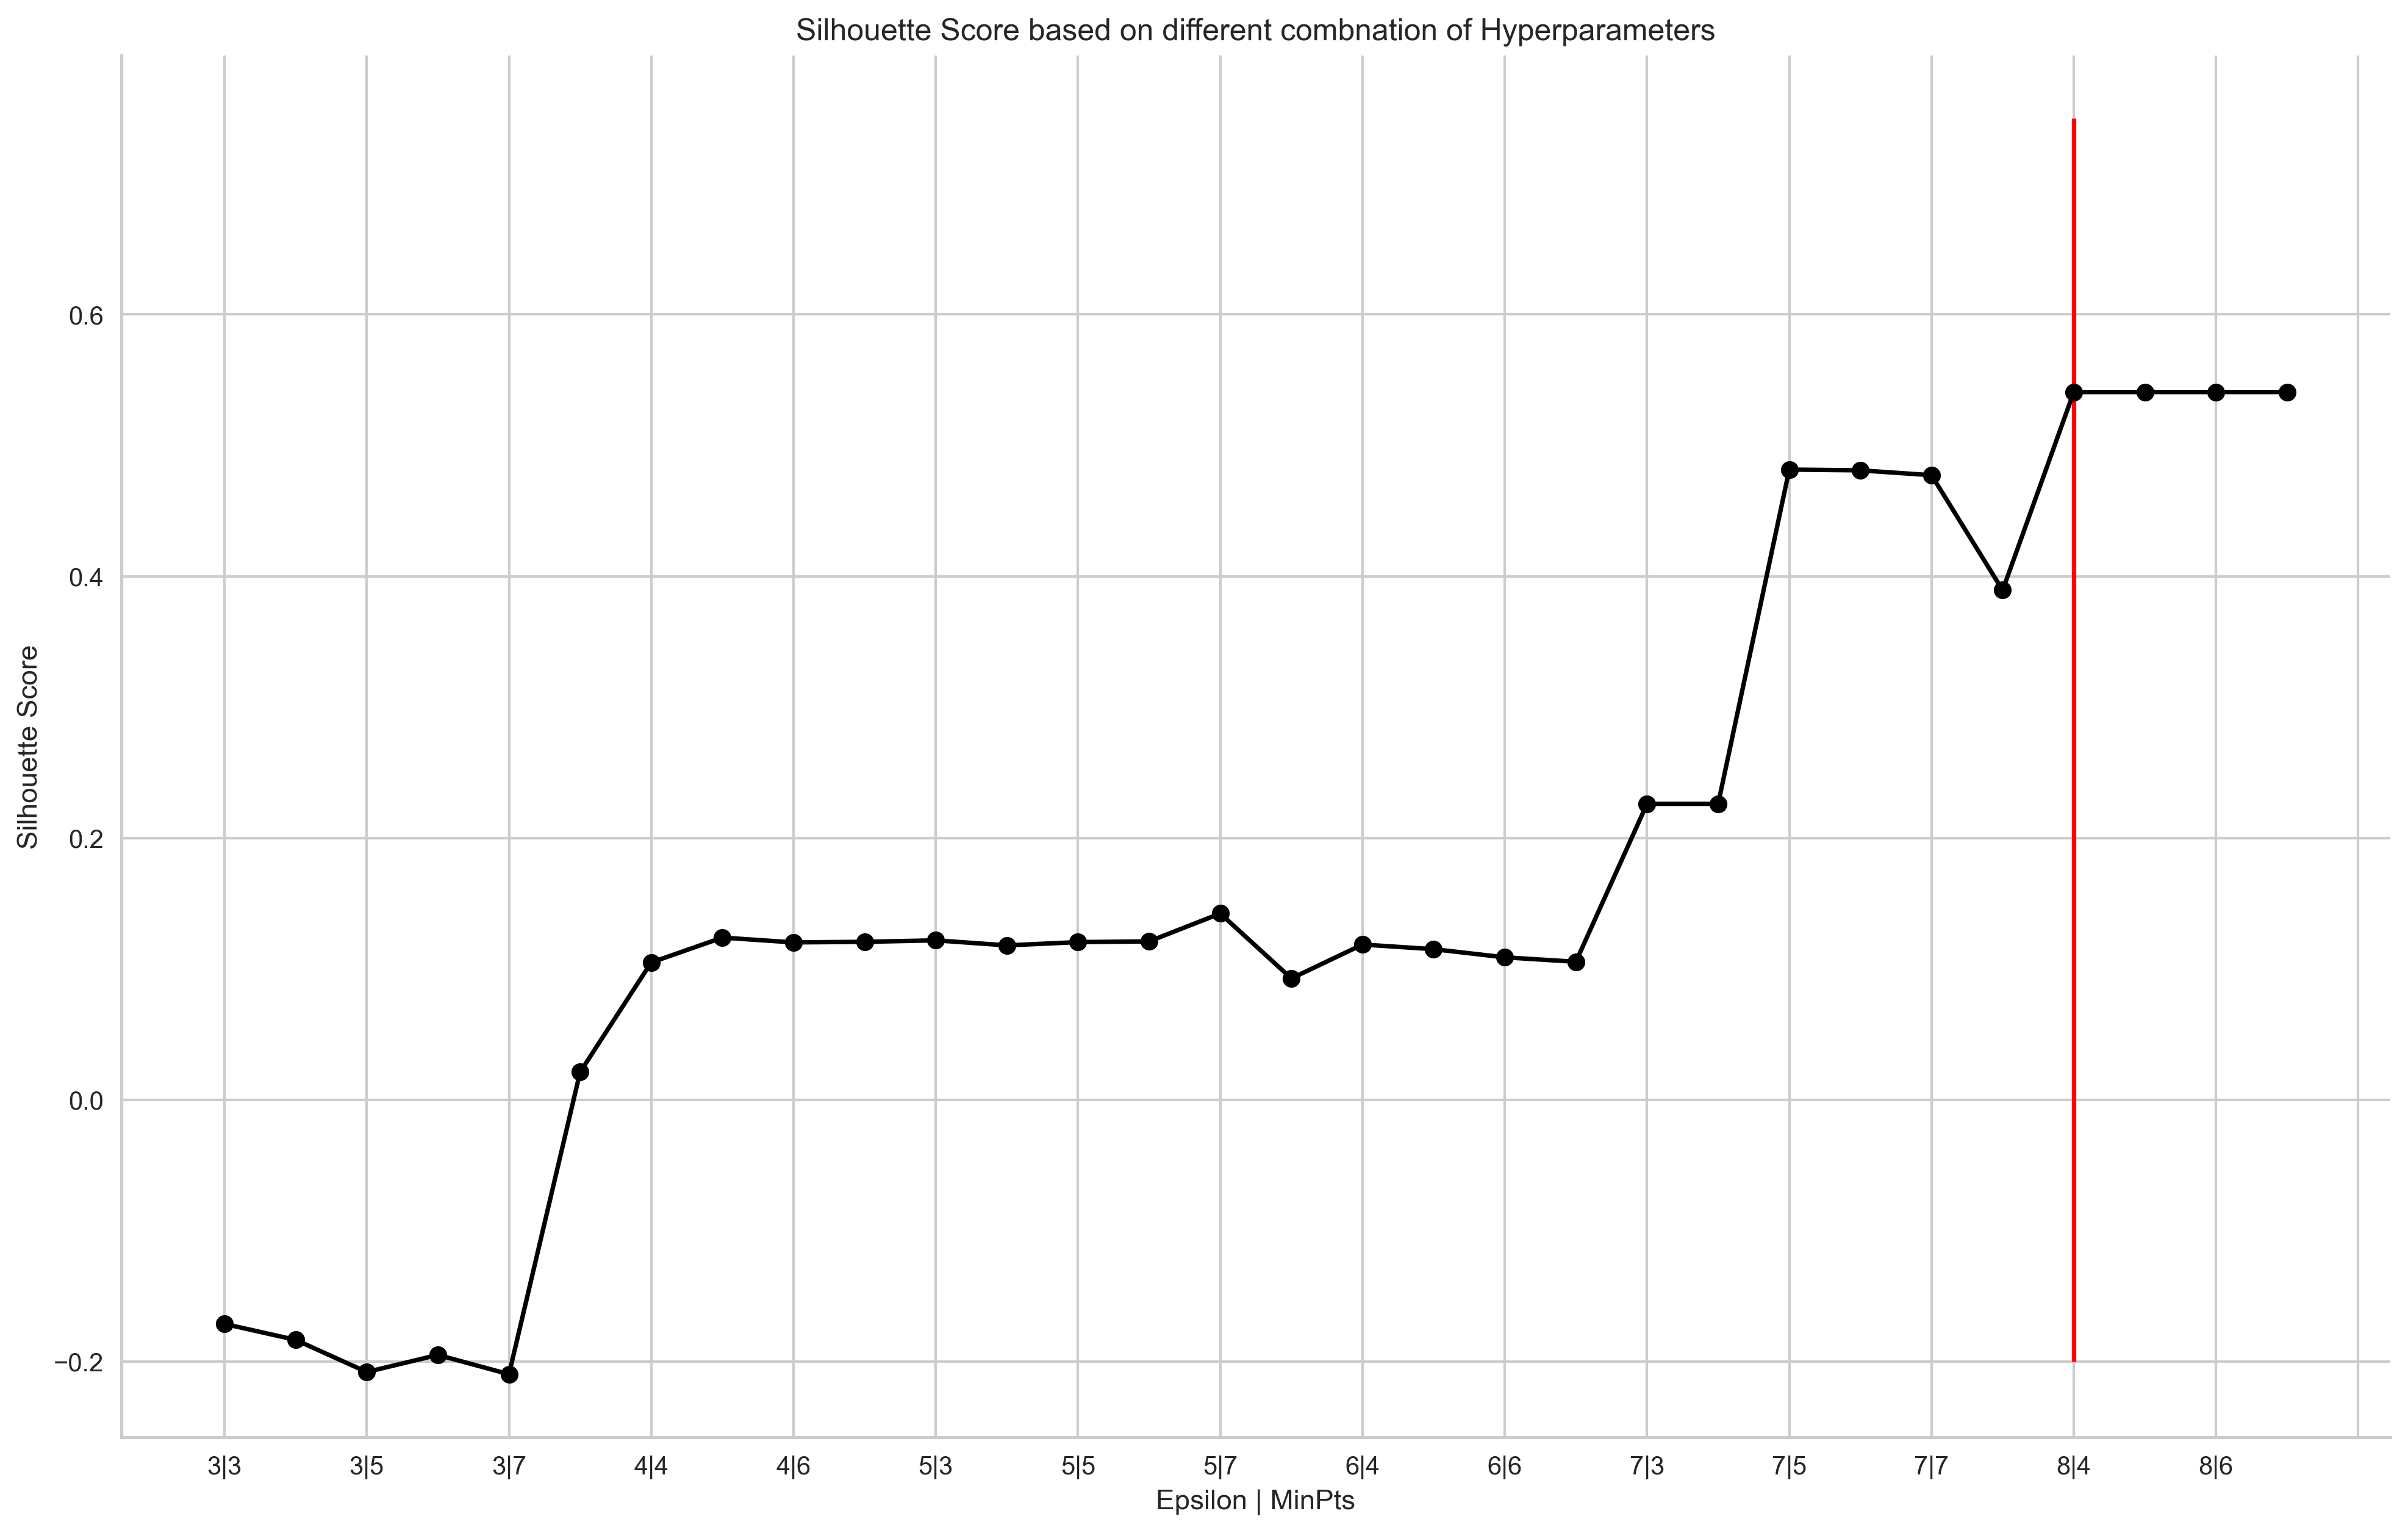

<Figure size 576x396 with 0 Axes>

In [417]:
PCAmod = PCA(n_components=40)
PCAmod.fit(X_gb_scaled)
PCA_df_gb = pd.DataFrame(PCAmod.transform(X_gb_scaled))

# To decide what hyperparameters (epsilon and min samples) to use, we will look at the Silhouette score

from sklearn import metrics

# Create empty lists
S=[] # this is to store Silhouette scores
D = [] # Check davies bouldin score
H = [] # Check calinski harabasz

comb=[] # this is to store combinations of epsilon / min_samples

# Define ranges to explore
eps_range=range(3, 9) # note, we will scale this down by 100 as we want to explore 0.06 - 0.11 range
minpts_range=range(3,8)

for k in eps_range:
    for j in minpts_range:
        # Set the model and its parameters
        model = DBSCAN(eps=k, min_samples=j)
        # Fit the model 
        clm = model.fit(PCA_df_gb)
        # Calculate Silhoutte, Davies Bouldin and Harabasz Score and append to a list
        S.append(metrics.silhouette_score(PCA_df_gb, clm.labels_, metric='euclidean'))
        D.append(metrics.davies_bouldin_score(PCA_df_gb, clm.labels_))
        H.append(metrics.calinski_harabasz_score(PCA_df_gb, clm.labels_))
        comb.append(str(k)+"|"+str(j)) # axis values for the graph


# Plot the resulting Silhouette scores on a graph
fig = plt.figure(figsize=(16,10), dpi=300)
ax = plt.subplot(1, 1, 1)
plt.plot(comb, S, 'bo-', color='black')
from matplotlib.ticker import MaxNLocator

ax.xaxis.set_major_locator(MaxNLocator(16))

plt.xlabel('Epsilon | MinPts')
plt.ylabel('Silhouette Score')
plt.vlines(x=26, ymin=-0.2, ymax=0.75, color='red')
plt.title('Silhouette Score based on different combnation of Hyperparameters')
plt.show()
plt.tight_layout()

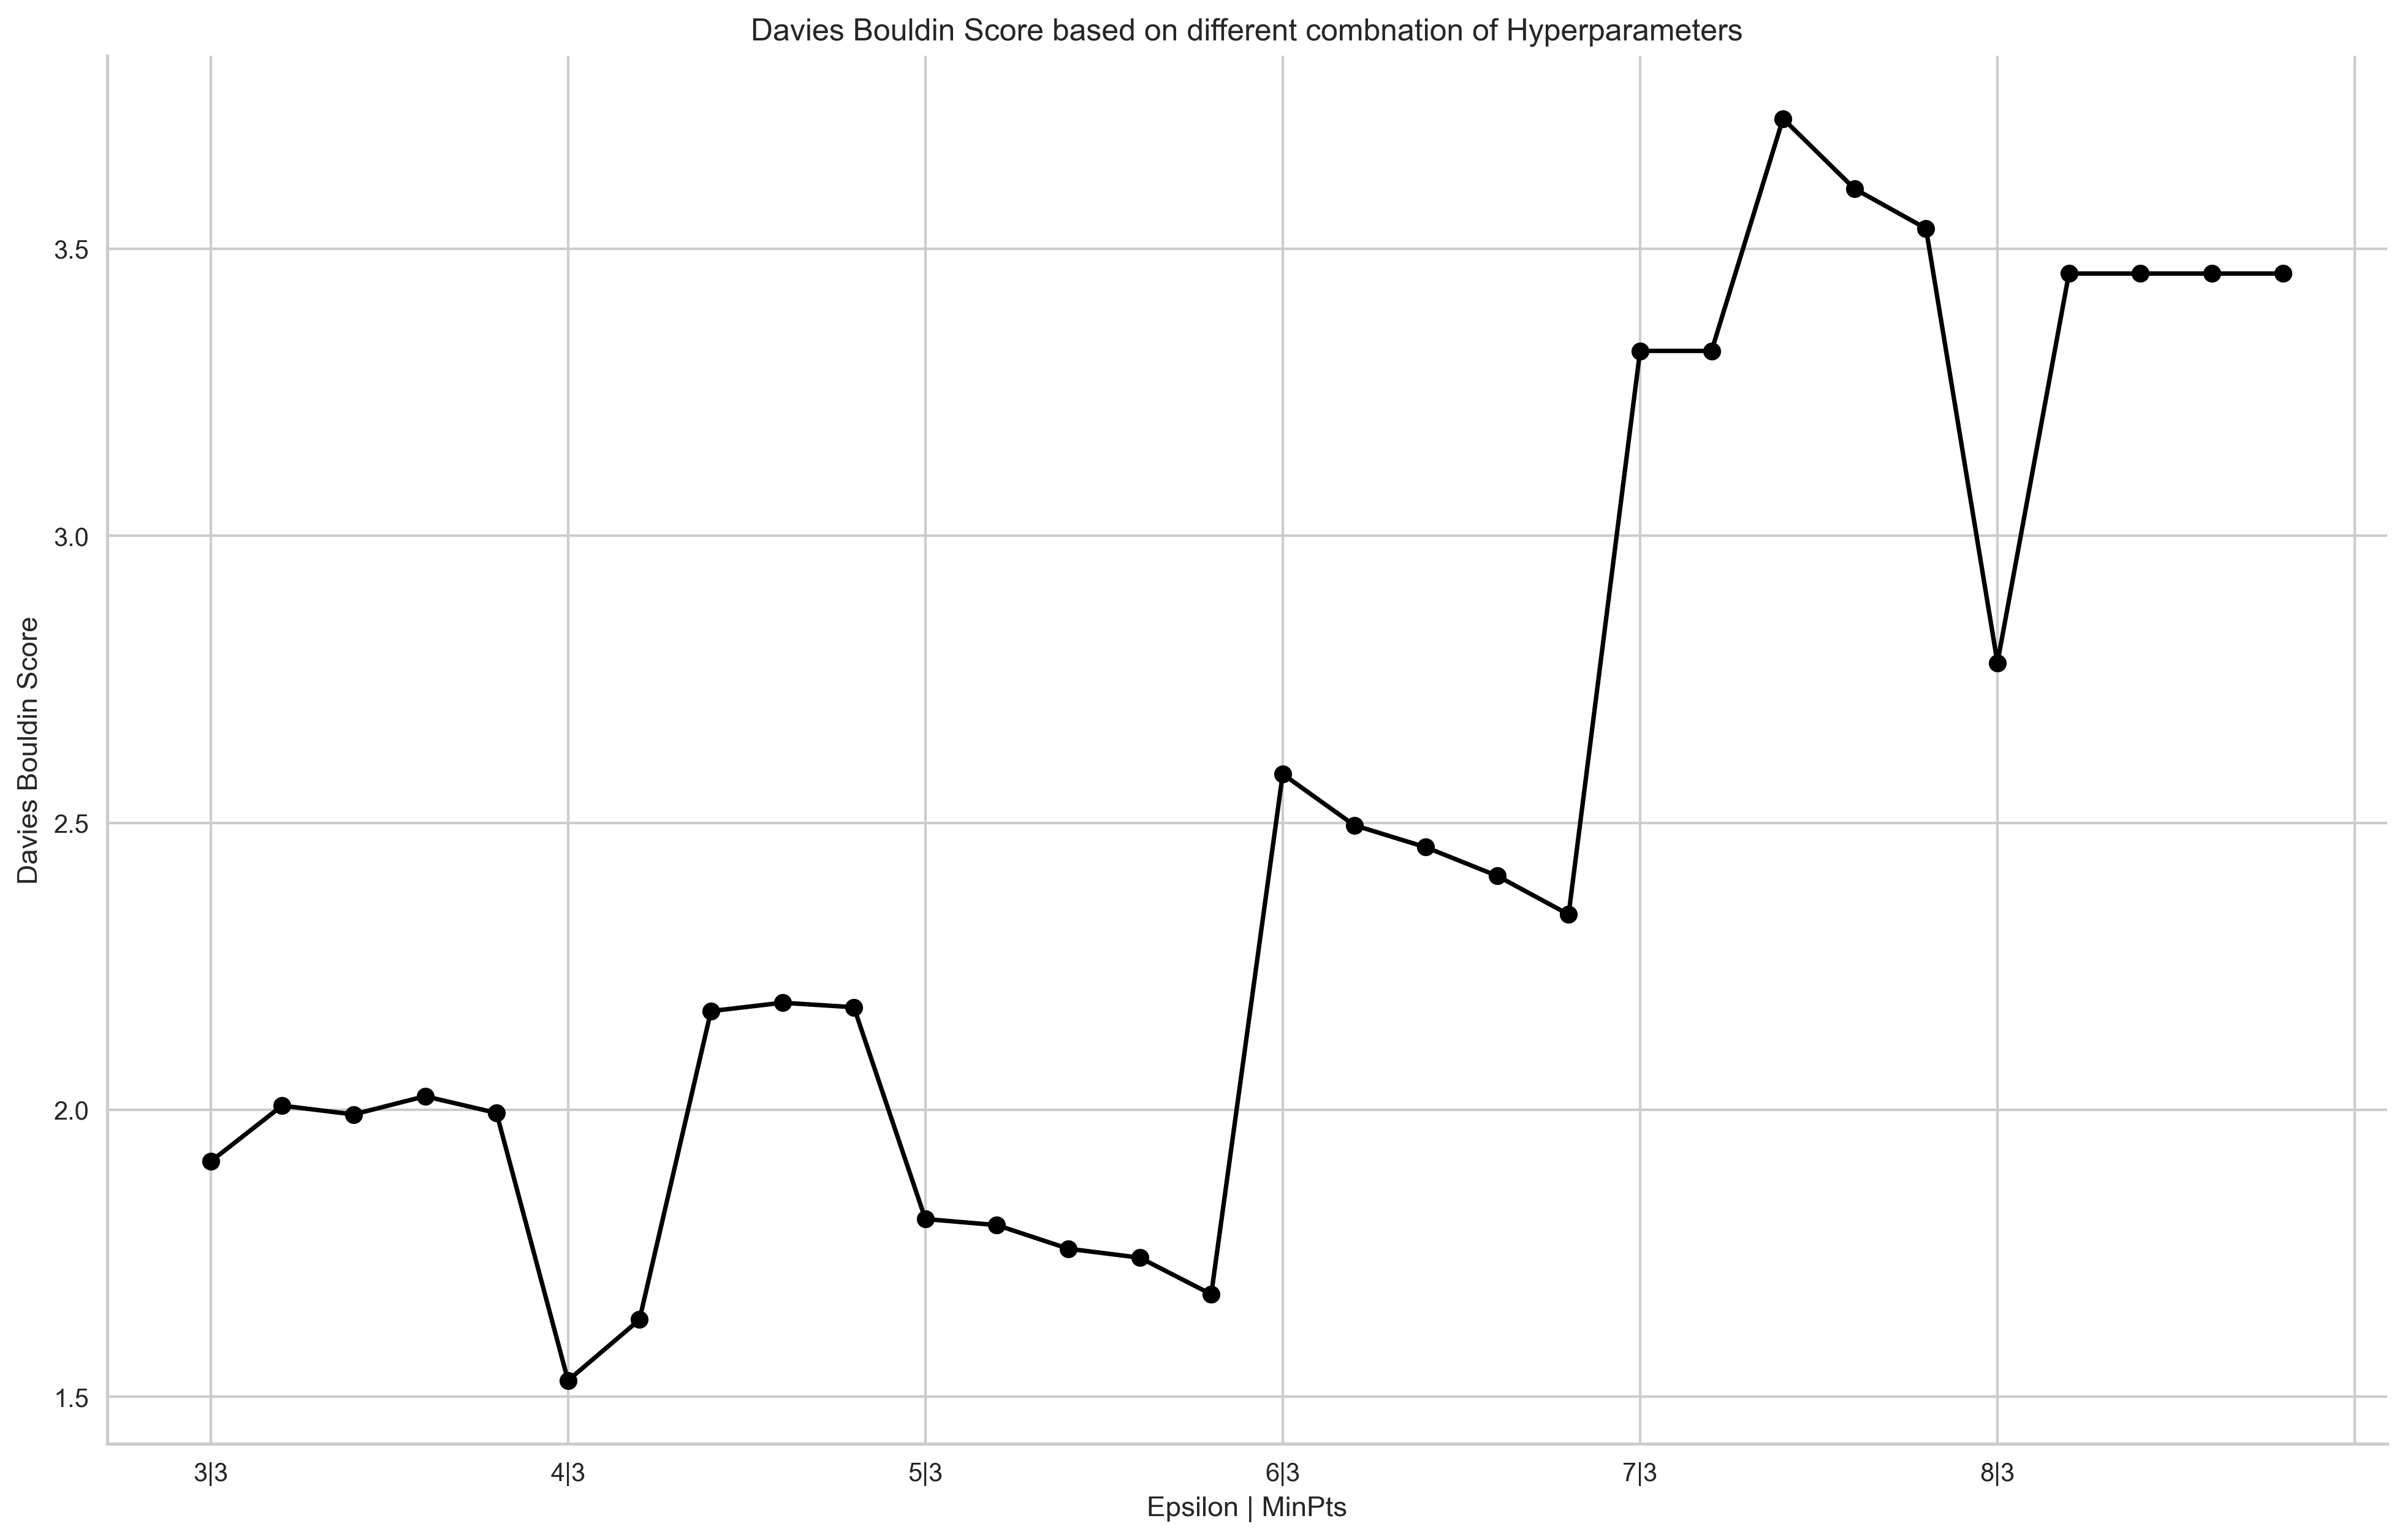

<Figure size 576x396 with 0 Axes>

In [422]:
fig = plt.figure(figsize=(16,10), dpi=300)
ax = plt.subplot(1, 1, 1)
plt.plot(comb, D, 'bo-', color='black')
from matplotlib.ticker import MaxNLocator

ax.xaxis.set_major_locator(MaxNLocator(7))

plt.xlabel('Epsilon | MinPts')
plt.ylabel('Davies Bouldin Score')
# plt.vlines(x=25, ymin=-0.2, ymax=0.75, color='red')
plt.title('Davies Bouldin Score based on different combnation of Hyperparameters')
plt.show()
plt.tight_layout()

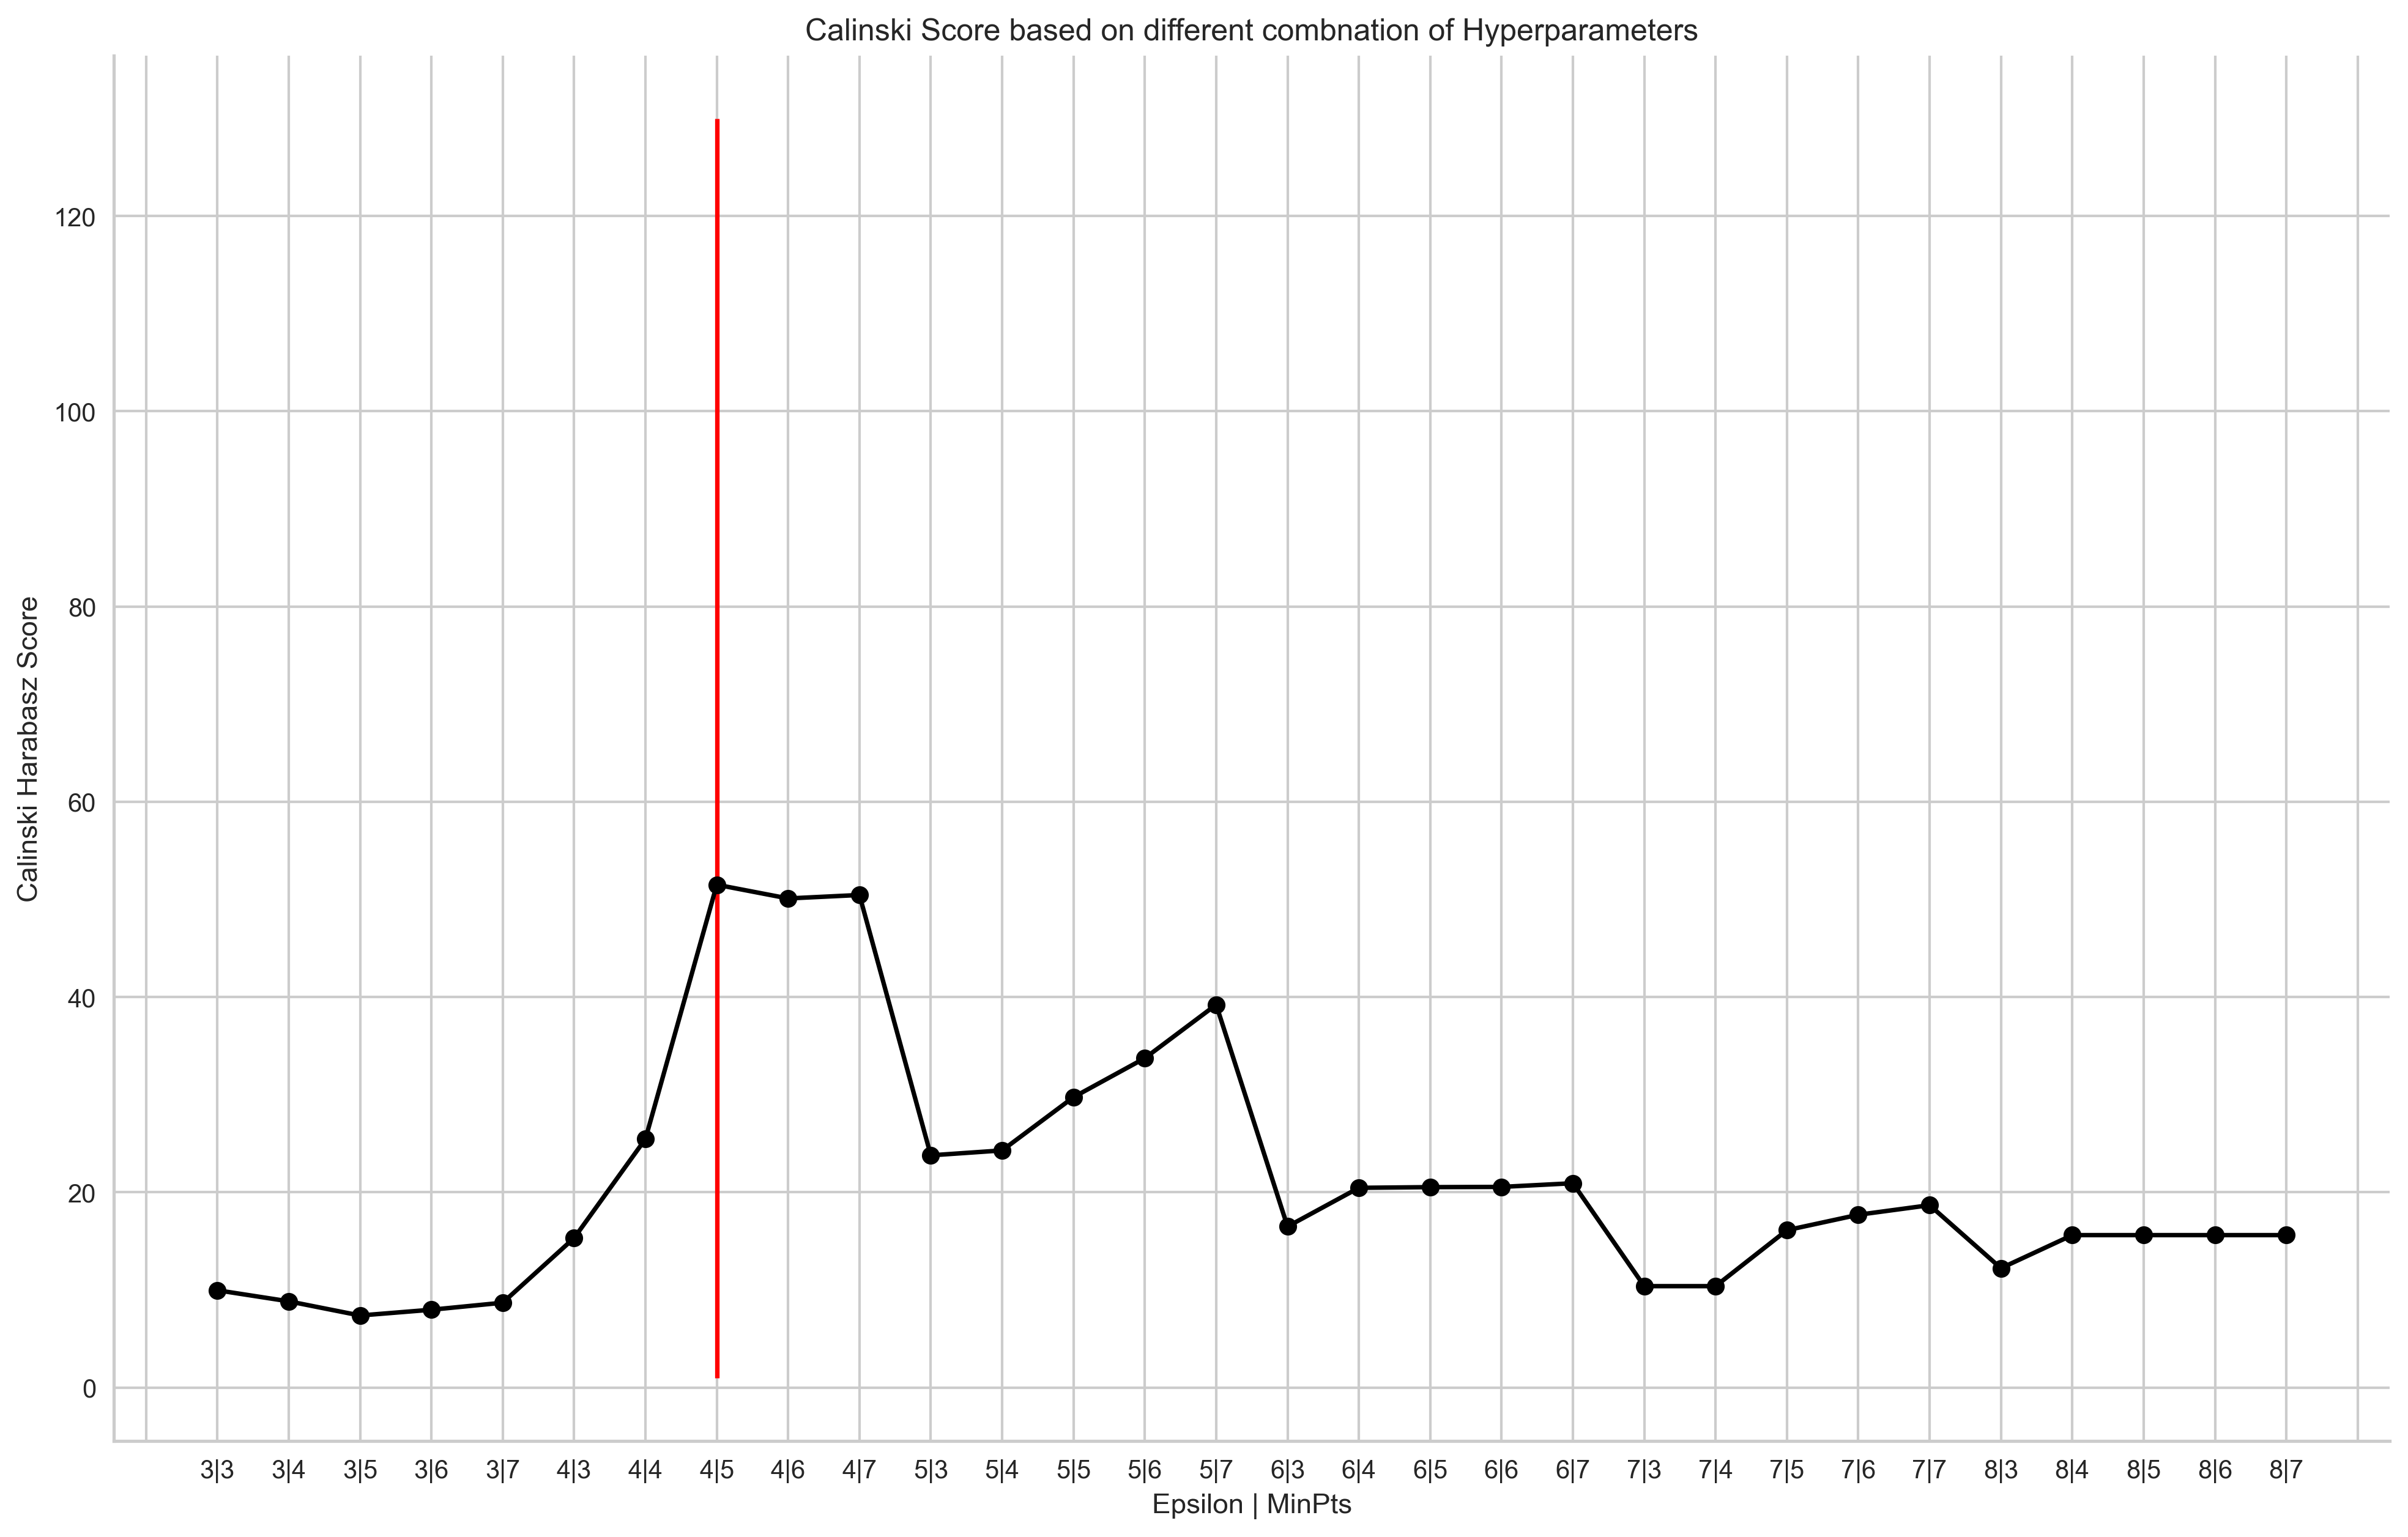

<Figure size 576x396 with 0 Axes>

In [439]:
# 4|3 according to davies bouldin, 4|5 according to Calinski,  8|4 according to Silhouette

fig = plt.figure(figsize=(16,10), dpi=300)
ax = plt.subplot(1, 1, 1)
plt.plot(comb, H, 'bo-', color='black')
from matplotlib.ticker import MaxNLocator

ax.xaxis.set_major_locator(MaxNLocator(39))

plt.xlabel('Epsilon | MinPts')
plt.ylabel('Calinski Harabasz Score')
plt.vlines(x=7, ymin=1, ymax=130, color='red')
plt.title('Calinski Score based on different combnation of Hyperparameters')
plt.show()
plt.tight_layout()

In [440]:
# First model: eps=4, MinPts=4
model44 = DBSCAN(eps=4, # default=0.5, The maximum distance between two samples for one to be considered as in the neighborhood of the other.
               min_samples=4, # default=5, The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
               metric='euclidean', # default='euclidean'. The metric to use when calculating distance between instances in a feature array. 
               metric_params=None, # default=None, Additional keyword arguments for the metric function.
               algorithm='auto', # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’, The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
               leaf_size=30, # default=30, Leaf size passed to BallTree or cKDTree.
               p=None, # default=None, The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2
               n_jobs=-1, # default=None, The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
              )

# Fit the models
clm44 = model44.fit(PCA_df_gb)

# Print DBSCAN results
print('*************** DBSCAN Clustering Model ***************')
print("Cluster labels for the first model")
print(np.unique(clm44.labels_))

*************** DBSCAN Clustering Model ***************
Cluster labels for the first model
[-1  0  1  2  3  4]


In [441]:
# 2nd model: eps=4, MinPts=3
model43 = DBSCAN(eps=4, # default=0.5, The maximum distance between two samples for one to be considered as in the neighborhood of the other.
               min_samples=3, # default=5, The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
               metric='euclidean', # default='euclidean'. The metric to use when calculating distance between instances in a feature array. 
               metric_params=None, # default=None, Additional keyword arguments for the metric function.
               algorithm='auto', # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’, The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
               leaf_size=30, # default=30, Leaf size passed to BallTree or cKDTree.
               p=None, # default=None, The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2
               n_jobs=-1, # default=None, The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
              )

# Fit the models
clm43 = model43.fit(PCA_df_gb)

# Print DBSCAN results
print('*************** DBSCAN Clustering Model ***************')
print("Cluster labels for the first model")
print(np.unique(clm43.labels_))

*************** DBSCAN Clustering Model ***************
Cluster labels for the first model
[-1  0  1  2  3  4  5  6  7  8  9 10 11]


In [442]:
# 3rd model: eps=8, MinPts=4
model84 = DBSCAN(eps=8, # default=0.5, The maximum distance between two samples for one to be considered as in the neighborhood of the other.
               min_samples=4, # default=5, The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
               metric='euclidean', # default='euclidean'. The metric to use when calculating distance between instances in a feature array. 
               metric_params=None, # default=None, Additional keyword arguments for the metric function.
               algorithm='auto', # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’, The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
               leaf_size=30, # default=30, Leaf size passed to BallTree or cKDTree.
               p=None, # default=None, The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2
               n_jobs=-1, # default=None, The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
              )

# Fit the models
clm84 = model84.fit(PCA_df_gb)

# Print DBSCAN results
print('*************** DBSCAN Clustering Model ***************')
print("Cluster labels for the first model")
print(np.unique(clm84.labels_))

*************** DBSCAN Clustering Model ***************
Cluster labels for the first model
[-1  0]


In [443]:
# adequate clusters come from using the davies bouldin result hence we will go with model 4 | 4

In [449]:
preds = model44.fit_predict(PCA_df_gb)

db_preds_gb = []
#Store the predicted labels
db_preds_gb.append(preds)

In [450]:
gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(db_preds_gb[0], 
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,-1,0,1,2,3,4
seat_types_yg,,,,,,
con lab marginal,40,107,0,0,0,0
con ld marginal,14,6,2,0,0,0
con pc marginal,1,0,0,0,0,0
con safe,15,242,2,0,0,0
con snp marginal,10,0,0,2,4,4
green safe,1,0,0,0,0,0
lab ld marginal,1,0,0,0,0,0
lab safe,85,50,0,0,0,0
lab snp marginal,2,0,0,8,0,0


In [451]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

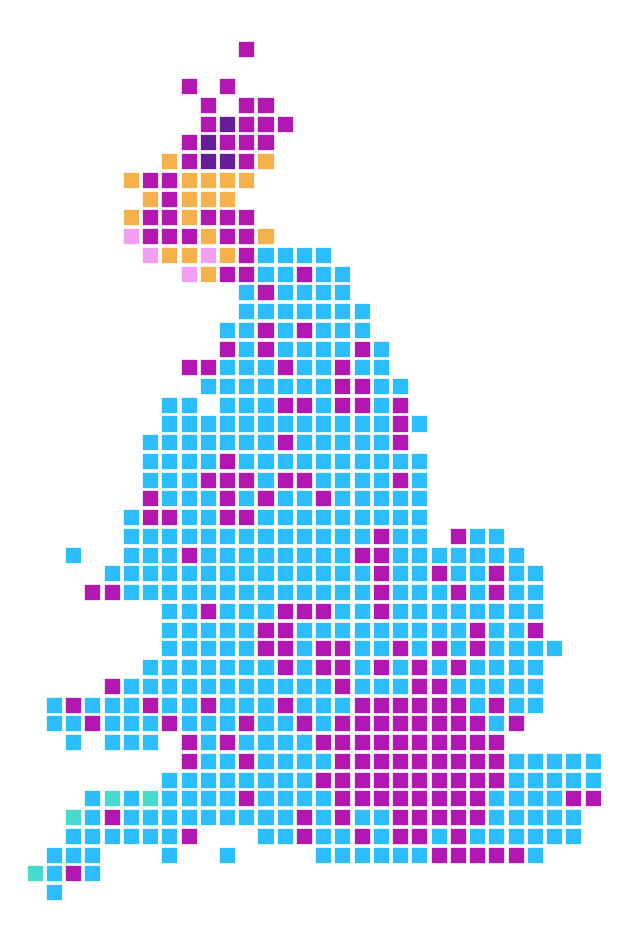

In [452]:
kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

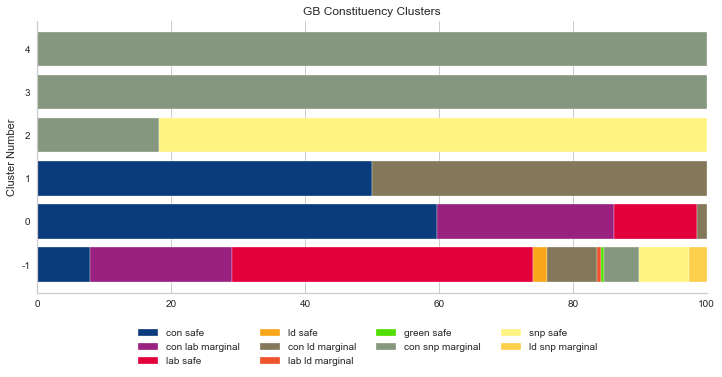

In [453]:
party_list = ['con safe','con lab marginal',
              'lab safe','ld safe',
              'con ld marginal','lab ld marginal',
              'green safe', 'con snp marginal', 'snp safe', 'ld snp marginal']

party_colors = [con_blue, con_lab, lab_red, lib_yel,
               con_lib, lab_lib, green_green, con_snp, snp_yel, lib_snp]

gb_cluster_yg_pivot=gb_cluster_yg_pivot.reindex(party_list)

gb_cluster_bar = (gb_cluster_yg_pivot / gb_cluster_yg_pivot.sum()).T

gb_cluster_bar.plot.barh(stacked=True,
                          figsize=(12,5),
                          width=0.8,
                          color=party_colors)

plt.xticks(ticks = np.arange(0,1.2,0.2), labels = np.arange(0,120,20))
plt.xlim(0,1);

plt.title('GB Constituency Clusters');
plt.ylabel('Cluster Number')

plt.legend(bbox_to_anchor=(0.85, -0.1),
           ncol=4,
           frameon=False);

In [454]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns

In [455]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(PCA_df_gb)
distances, indices = nbrs.kneighbors(PCA_df_gb)

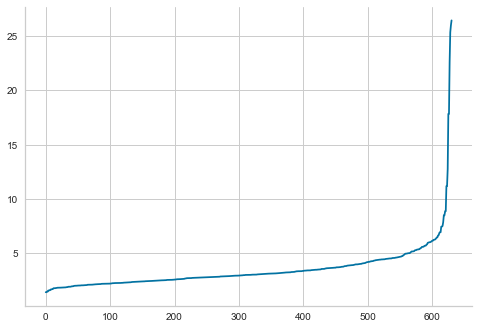

In [456]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [465]:
# First model: eps=5, MinPts=10
model5_10 = DBSCAN(eps=5, # default=0.5, The maximum distance between two samples for one to be considered as in the neighborhood of the other.
               min_samples=10, # default=5, The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
               metric='euclidean', # default='euclidean'. The metric to use when calculating distance between instances in a feature array. 
               metric_params=None, # default=None, Additional keyword arguments for the metric function.
               algorithm='auto', # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’, The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
               leaf_size=30, # default=30, Leaf size passed to BallTree or cKDTree.
               p=None, # default=None, The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2
               n_jobs=-1, # default=None, The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
              )

# Fit the models
clm5_10 = model5_10.fit(PCA_df_gb)
print(np.unique(clm5_10.labels_))

[-1  0  1  2]


In [466]:
preds = model5_10.fit_predict(PCA_df_gb)

db_preds_gb = []
#Store the predicted labels
db_preds_gb.append(preds)

In [467]:
gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(db_preds_gb[0], 
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,-1,0,1,2
seat_types_yg,,,,
con lab marginal,19,128,0,0
con ld marginal,15,7,0,0
con pc marginal,1,0,0,0
con safe,8,251,0,0
con snp marginal,8,0,2,10
green safe,1,0,0,0
lab ld marginal,1,0,0,0
lab safe,75,60,0,0
lab snp marginal,1,0,9,0


In [468]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

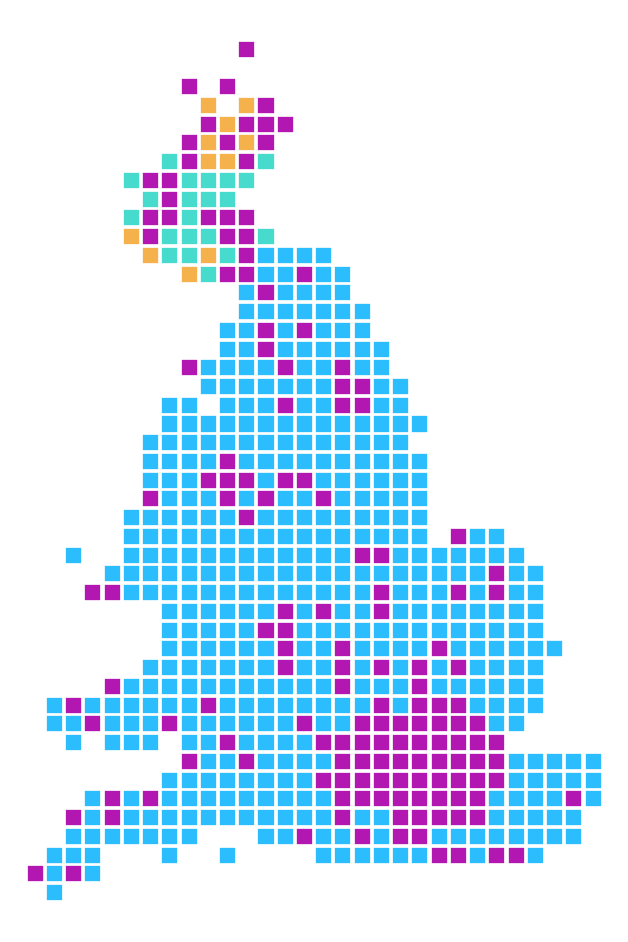

In [469]:
kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

Optimal number of min_samples based on silhouette score: [16, 17, 18]


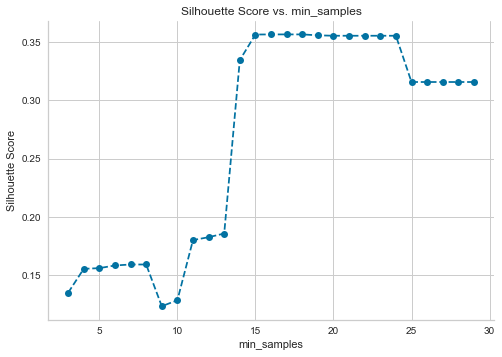

In [470]:
# Silhouette Score for DBSCAN

from sklearn.metrics import silhouette_score 
from sklearn.cluster import DBSCAN

def get_dbscan_score(data, center):
    '''
    
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Silhouette Score for DBSCAN
    '''
    #instantiate kmeans
    dbscan = DBSCAN(eps= 6.439683430645208, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(data)
    
    # Calculate Silhoutte Score

    score = silhouette_score(data, model.labels_, metric='euclidean')
    
    return score

scores = []
centers = list(range(3,30))

for center in centers:
    scores.append(get_dbscan_score(PCA_df_gb, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs. min_samples');

df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_samples based on silhouette score:', df4['min_samples'].tolist())

Optimal number of min_samples based on DB score: [10]


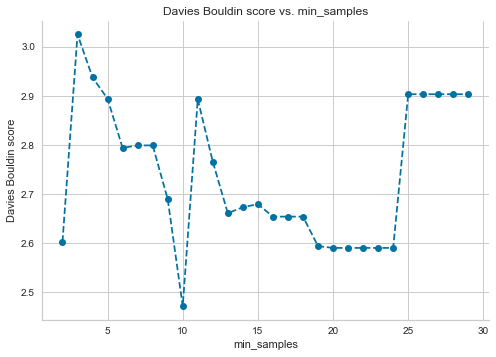

In [471]:
# Davies Bouldin score for DBSCAN

from sklearn.metrics import davies_bouldin_score 

def get_dbscan_score(data, center):
    '''
    returns the dbscan score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit dbscan to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the dbscan model fit to the data
    '''
    #instantiate dbscan
    dbscan = DBSCAN(eps=6.439683430645208, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit_predict(data)
    
    # Calculate Silhoutte Score

    score = davies_bouldin_score(data, model)
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(PCA_df_gb, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. min_samples');


df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of min_samples based on DB score:', df4['min_samples'].tolist())

Optimal number of min_sample based on Calinski Harabasz score: [20, 21, 22, 23, 24]


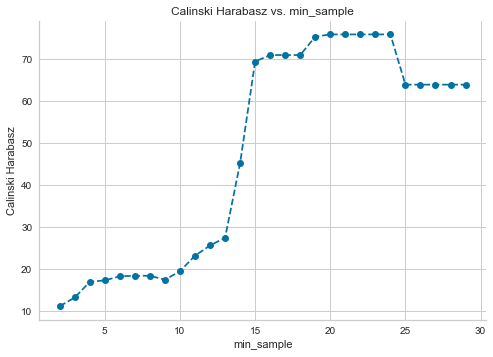

In [472]:
# Calinski Harabasz for DBSCAN

from sklearn.metrics import calinski_harabasz_score  

def get_dbscan_score(data, center):
    '''
    
    INPUT:
        data - the dataset you want to fit dbscan to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Calinski Harabasz score for the dbscan model fit to the data
    '''
    #instantiate dbscan
    dbscan = DBSCAN(eps=6.439683430645208, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(data)
    
    # Calculate Silhoutte Score

    score = calinski_harabasz_score(data, dbscan.labels_)
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(PCA_df_gb, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_sample');
plt.ylabel('Calinski Harabasz');
plt.title('Calinski Harabasz vs. min_sample');

df3 = pd.DataFrame(centers,columns=['min_sample'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_sample based on Calinski Harabasz score:', df4['min_sample'].tolist())

### Gaussian Mixture Modelling

In [473]:
# BIC for GMM

from sklearn.mixture import GaussianMixture
n_components = range(1, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        gmm.fit(PCA_df_gb)
        score.append((cov,n_comp,gmm.bic(PCA_df_gb)))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','BIC_Score']
score_2 = score_1[score_1.BIC_Score == score_1.BIC_Score.min()]

score_2.head(n=2)

,Covariance_Type,N_Components,BIC_Score
52,tied,24,22809.267434


In [474]:
# Calinski Harabasz Score for GMM


n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        model = gmm.fit(PCA_df_gb)
        model_2 = model.predict(PCA_df_gb)
        score_c = calinski_harabasz_score(PCA_df_gb, model_2)
        score.append((cov,n_comp,score_c))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Calinski_Harabasz_Score']
score_2 = score_1[score_1.Calinski_Harabasz_Score == score_1.Calinski_Harabasz_Score.max()]
score_2.head(n=5)

,Covariance_Type,N_Components,Calinski_Harabasz_Score
28,tied,2,157.147662


In [475]:
# Davies Bouldin Score for GMM


n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        model = gmm.fit(PCA_df_gb)
        model_2 = model.predict(PCA_df_gb)
        score_d = davies_bouldin_score(PCA_df_gb, model_2)
        score.append((cov,n_comp,score_d))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Davies_Bouldin_Score']
score_2 = score_1[score_1.Davies_Bouldin_Score == score_1.Davies_Bouldin_Score.max()]
score_2.head(n=2)

,Covariance_Type,N_Components,Davies_Bouldin_Score
56,diag,2,4.547954


In [476]:
# Silhouette Score for GMM


n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov,random_state = 10)
        model = gmm.fit(PCA_df_gb)
        model_2 = model.predict(PCA_df_gb)
        score_s = silhouette_score(PCA_df_gb, model_2, metric='euclidean')
        score.append((cov,n_comp,score_s))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Silhouette_Score']
score_2 = score_1[score_1.Silhouette_Score == score_1.Silhouette_Score.max()]
score_2.head(n=2)

,Covariance_Type,N_Components,Silhouette_Score
28,tied,2,0.381588


In [287]:
# Both Calinski and Silhouette indicate tied and 2 hence we will go with the majority

In [289]:
from numpy import unique

In [477]:
# define the model
model = GaussianMixture(n_components= 2,covariance_type= "tied", random_state = 10) # davies bouldin
# fit the model
model.fit(PCA_df_gb)
# assign a cluster to each example
yhat = model.predict(PCA_df_gb)
# retrieve unique clusters
clusters = unique(yhat)


db_preds_gb = []
#Store the predicted labels
db_preds_gb.append(yhat)


gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(db_preds_gb[0], 
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1
seat_types_yg,,
con lab marginal,129,18
con ld marginal,19,3
con pc marginal,1,0
con safe,258,1
con snp marginal,20,0
green safe,0,1
lab ld marginal,1,0
lab safe,71,64
lab snp marginal,10,0


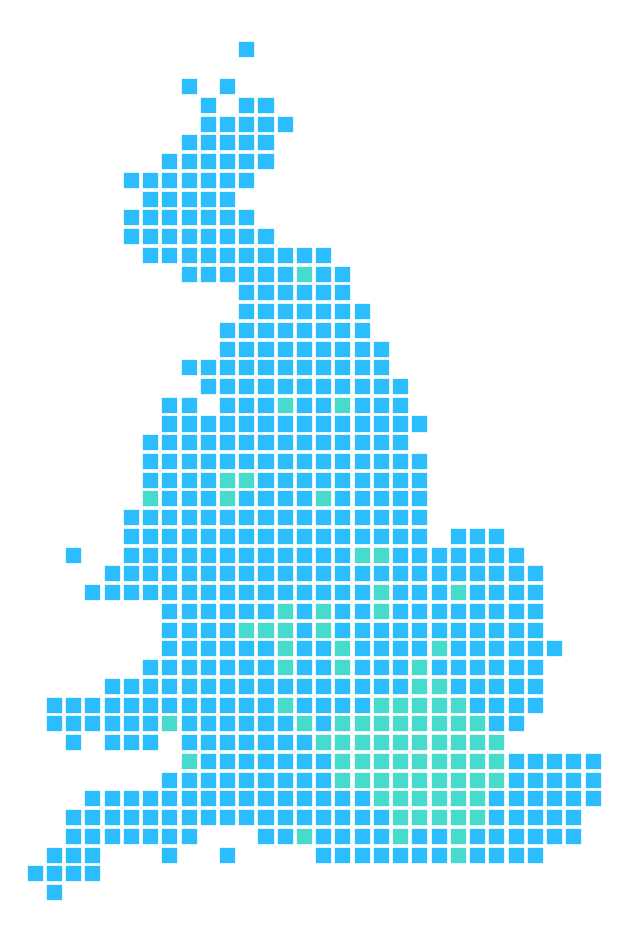

In [478]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

In [479]:
# Let us try Davies Boudlin Score

# define the model
model = GaussianMixture(n_components= 2,covariance_type= "diag", random_state = 10) # davies bouldin
# fit the model
model.fit(PCA_df_gb)
# assign a cluster to each example
yhat = model.predict(PCA_df_gb)
# retrieve unique clusters
clusters = unique(yhat)


db_preds_gb = []
#Store the predicted labels
db_preds_gb.append(yhat)


gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(db_preds_gb[0], 
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1
seat_types_yg,,
con lab marginal,6,141
con ld marginal,14,8
con pc marginal,1,0
con safe,11,248
con snp marginal,15,5
green safe,1,0
lab ld marginal,1,0
lab safe,30,105
lab snp marginal,7,3


### Mean Shift

In [480]:
from sklearn.cluster import MeanShift

In [481]:
# Calinski Harabasz Score for Mean Shift


bandwidths = range(2, 11)
score=[]
for b in bandwidths:
        ms = MeanShift(bandwidth=b)
        model = ms.fit(PCA_df_gb)
        model_2 = model.predict(PCA_df_gb)
        score_d = calinski_harabasz_score(PCA_df_gb, model_2)
        score.append((b, score_d))
score_1 = pd.DataFrame(score)
score_1.columns = ['Bandwiths', 'Calinski_Harabasz_Score']
score_2 = score_1[score_1.Calinski_Harabasz_Score == score_1.Calinski_Harabasz_Score.max()]
score_2.head(n=2)

,Bandwiths,Calinski_Harabasz_Score
0,2,35.544812


In [482]:
# Silhouette Score for Mean Shift


bandwidths = range(2, 11)
score=[]
for b in bandwidths:
        ms = MeanShift(bandwidth=b)
        model = ms.fit(PCA_df_gb)
        model_2 = model.predict(PCA_df_gb)
        score_d = silhouette_score(PCA_df_gb, model_2, metric='euclidean')
        score.append((b, score_d))
score_1 = pd.DataFrame(score)
score_1.columns = ['Bandwiths', 'Silhouette_Score']
score_2 = score_1[score_1.Silhouette_Score == score_1.Silhouette_Score.max()]
score_2.head(n=2)

,Bandwiths,Silhouette_Score
6,8,0.396219


In [483]:
# Davies Bouldin Score for Mean Shift


bandwidths = range(2, 11)
score=[]
for b in bandwidths:
        ms = MeanShift(bandwidth=b)
        model = ms.fit(PCA_df_gb)
        model_2 = model.predict(PCA_df_gb)
        score_d = davies_bouldin_score(PCA_df_gb, model_2)
        score.append((b, score_d))
score_1 = pd.DataFrame(score)
score_1.columns = ['Bandwiths', 'Davies_Bouldin_Score']
score_2 = score_1[score_1.Davies_Bouldin_Score == score_1.Davies_Bouldin_Score.min()]
score_2.head(n=2)

,Bandwiths,Davies_Bouldin_Score
0,2,0.250661


In [487]:
ms = MeanShift(bandwidth=10)
ms.fit(PCA_df_gb)

yhat = ms.predict(PCA_df_gb)
# retrieve unique clusters
clusters = unique(yhat)


db_preds_gb = []
#Store the predicted labels
db_preds_gb.append(yhat)


gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(db_preds_gb[0], 
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1,2,3,4,5,6,7,8,9,10,11,12
seat_types_yg,,,,,,,,,,,,,
con lab marginal,146,0,0,0,1,0,0,0,0,0,0,0,0
con ld marginal,22,0,0,0,0,0,0,0,0,0,0,0,0
con pc marginal,0,0,0,1,0,0,0,0,0,0,0,0,0
con safe,258,0,0,0,0,0,1,0,0,0,0,0,0
con snp marginal,20,0,0,0,0,0,0,0,0,0,0,0,0
green safe,0,0,0,0,0,1,0,0,0,0,0,0,0
lab ld marginal,0,0,1,0,0,0,0,0,0,0,0,0,0
lab safe,134,0,1,0,0,0,0,0,0,0,0,0,0
lab snp marginal,10,0,0,0,0,0,0,0,0,0,0,0,0


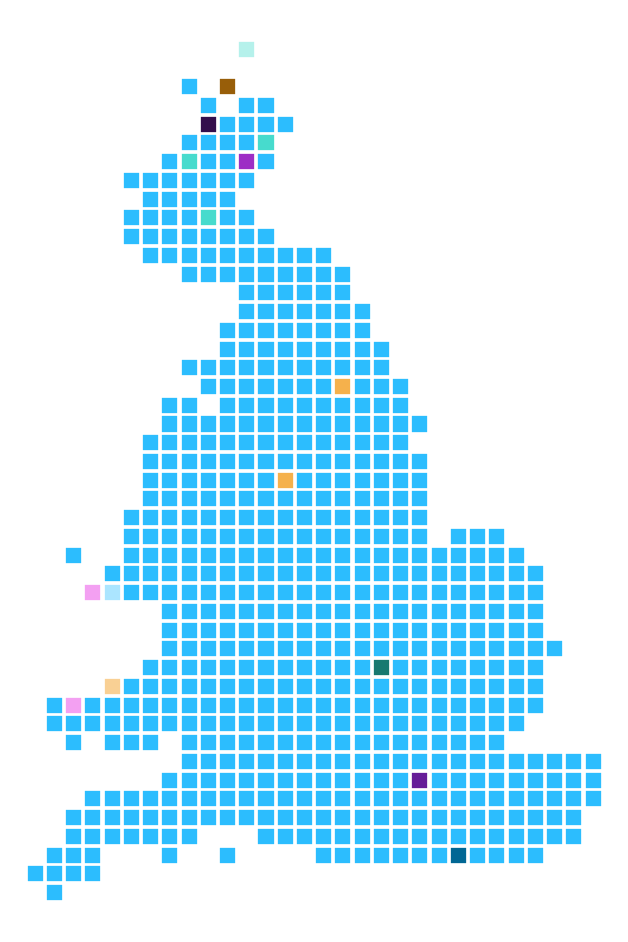

In [485]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)